## 1. Importing all the packages

In [35]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from pandas import set_option
plt.style.use('ggplot')
from scipy.stats import randint
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## 2. Reading the Credit Deafult data

In [36]:
os.chdir("C:/D Drive Data/Max_Life/Data/")
data=pd.read_excel("case_study_data.xlsx")
data.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2


## 3. Data Exploration

In [31]:
data.shape

(1000, 21)

- The data contains 1000 rows with 21 Columns (20 features/idependent variables and 1 dependent variable) 

In [32]:
data.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

### 1. Checking for Missing values in the data

In [34]:
data.isna().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

<div class="alert alert-block alert-success"> - The data does not have any missing value

### 2. Analysing unique values in the categorical variables

In [380]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_datetime64_dtype

for i in data.columns:
    if bool(is_string_dtype(data[i]))==True:
        print(i,":",data[i].unique())

checkin_acc : ['A11' 'A12' 'A14' 'A13']
credit_history : ['A34' 'A32' 'A33' 'A30' 'A31']
purpose : ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
svaing_acc : ['A65' 'A61' 'A63' 'A64' 'A62']
present_emp_since : ['A75' 'A73' 'A74' 'A71' 'A72']
personal_status : ['A93' 'A92' 'A91' 'A94']
other_debtors : ['A101' 'A103' 'A102']
property : ['A121' 'A122' 'A124' 'A123']
inst_plans : ['A143' 'A141' 'A142']
housing : ['A152' 'A153' 'A151']
job : ['A173' 'A172' 'A174' 'A171']
telephone : ['A192' 'A191']
foreign_worker : ['A201' 'A202']


- We can see all the categorical variables are encoded with a prefix A and there are no redundant categories

### 3. Checking for Duplicate Rows

In [381]:
duplicate_rows_df = data[data.duplicated()]
print('number of duplicate rows:', duplicate_rows_df.shape)

number of duplicate rows: (0, 21)


<div class="alert alert-block alert-success"> - The data does not have any duplicate rows

### 4. Descriptive Statistics

In [382]:
set_option('display.width', 100)
set_option('precision', 2)

print("DESCRIPTIVE STATISTICS OF NUMERIC COLUMNS")
print()
print(data.describe().T)

DESCRIPTIVE STATISTICS OF NUMERIC COLUMNS

                 count     mean      std    min      25%     50%     75%      max
duration        1000.0    31.45    18.06    6.0    18.00    27.0    36.0    108.0
amount          1000.0  4907.13  4234.10  375.0  2048.25  3479.5  5958.5  27636.0
inst_rate       1000.0     4.61     1.57    2.0     3.00     5.0     6.0      6.0
residing_since  1000.0     4.41     1.57    2.0     3.00     5.0     6.0      6.0
age             1000.0    53.57    17.07   29.0    41.00    50.0    63.0    113.0
num_credits     1000.0     2.44     0.70    2.0     2.00     2.0     3.0      6.0
dependents      1000.0     2.15     0.36    2.0     2.00     2.0     2.0      3.0
status          1000.0     1.30     0.46    1.0     1.00     1.0     2.0      2.0


- Credit amount is higly skewed as observed by the huge difference between min and max values and the quartiles.
- Status is the dependent variable which needs to be coded to 0 representing good customers and 1 indicating bad customers.
- The variables will be analysed further with the graphs to gauge better understanding of their distributions.

In [383]:
# The frequency of default rate at the bank
data['status'].value_counts()


1    700
2    300
Name: status, dtype: int64

In [3]:
# Percentage
good_customer = round(data.loc[data['status']==1,'status'].sum()/len(data)*100, 1)
bad_customer = round(data.loc[data['status']==2,'status'].count()/len(data)*100, 1)
print("Percentage of good customer is :",good_customer,"\nPercentage of bad customer is :",bad_customer)

Percentage of good customer is : 70.0 
Percentage of bad customer is : 30.0


In [37]:
#Replacing 1 by 0 and 2 by 1
data.status.replace([1,2], [0,1], inplace=True)

<Figure size 504x288 with 0 Axes>

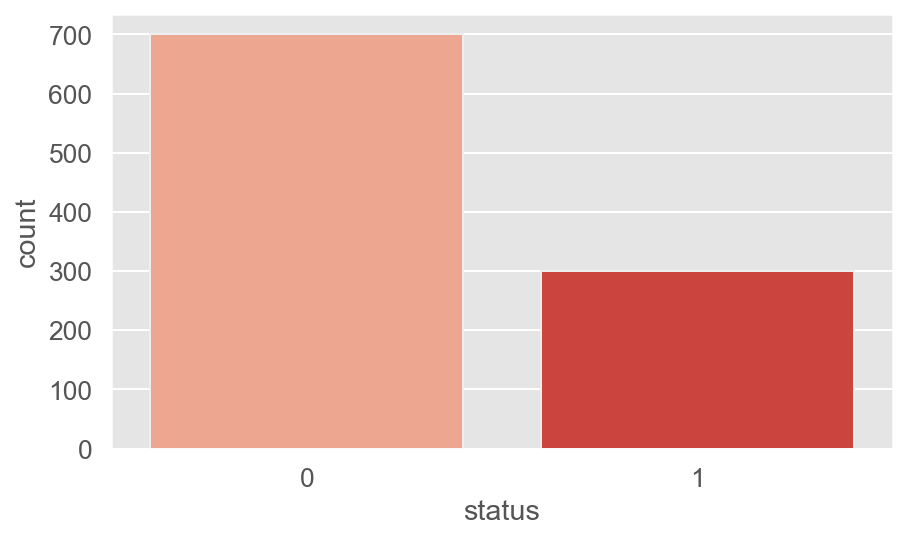

In [386]:
import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('status',data=data, palette="Reds")
%config InlineBackend.figure_format ='retina'

- It can be observed that our dependant variable is imbalanced having 30 % default rate and 70% non-default rate.
- This discrepancy can be handled by exploring oversampling and undersampling techniques.

### 5. Correlation Analysis

<Figure size 1440x720 with 0 Axes>

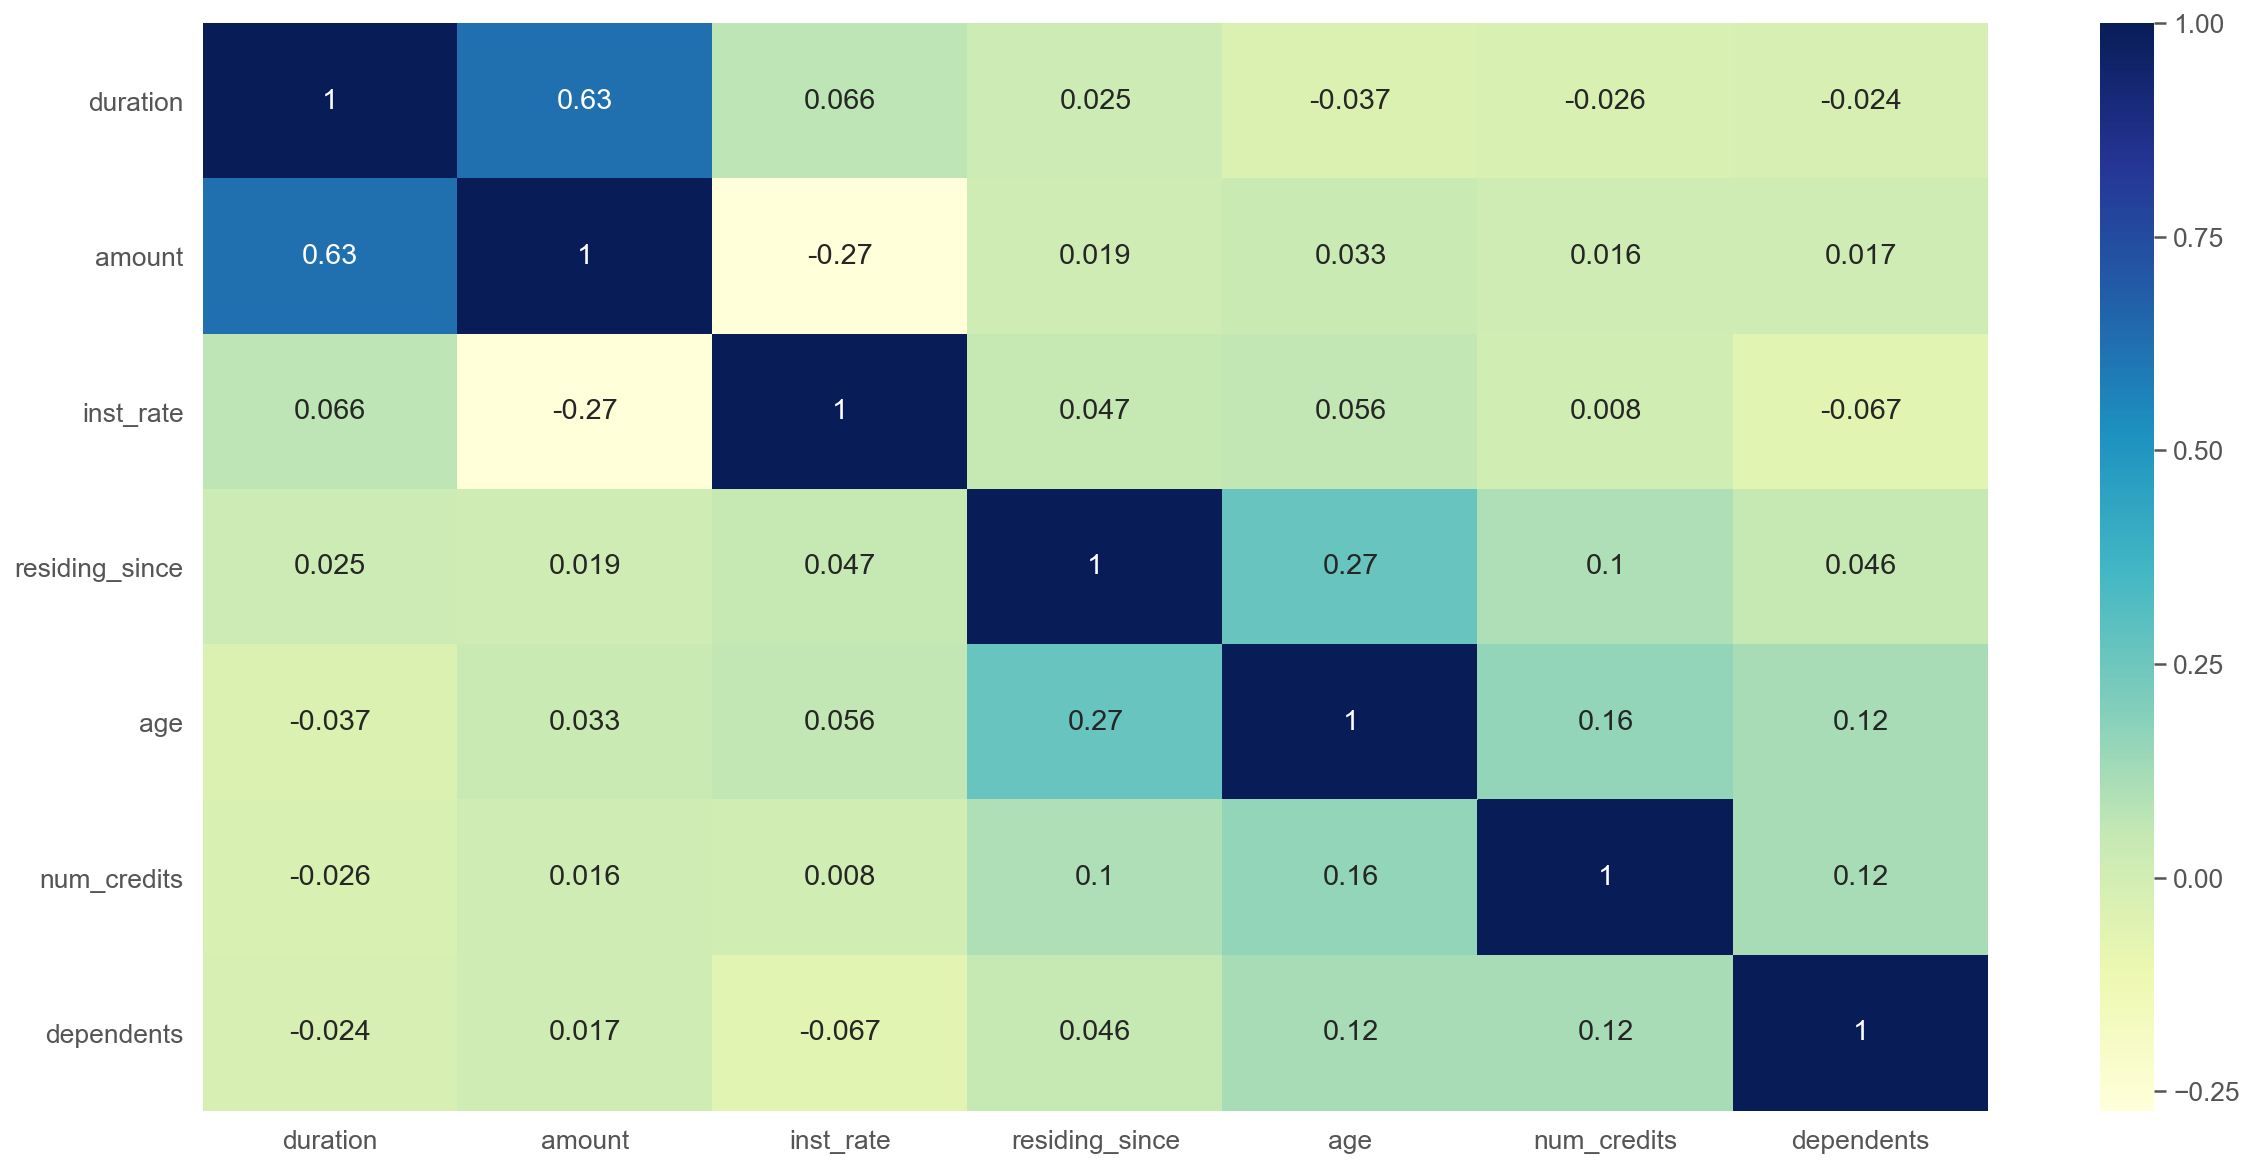

In [387]:
# Calculate correlations
plt.figure(figsize=(20,10))
c= data.iloc[:,:-1].corr()
sns.heatmap(c,cmap='YlGnBu',annot=True)

- There is a strong positive correlation between credit card amount and duration.
- There is no strong multicollinearity amongst features.

### 6. Visualizations

In [388]:
## Barchart of categorical variables with credit default variable
cat=[]
for i in data.columns:
    if bool(is_string_dtype(data[i]))==True:
        cat.append(i)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

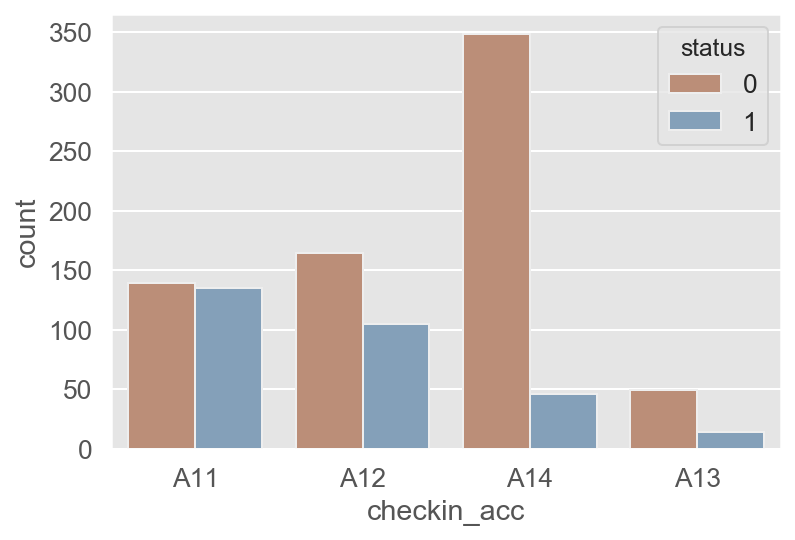

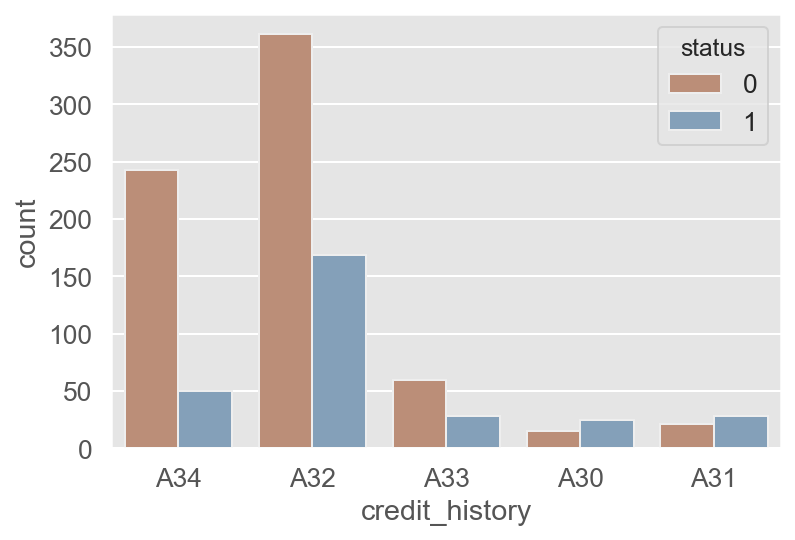

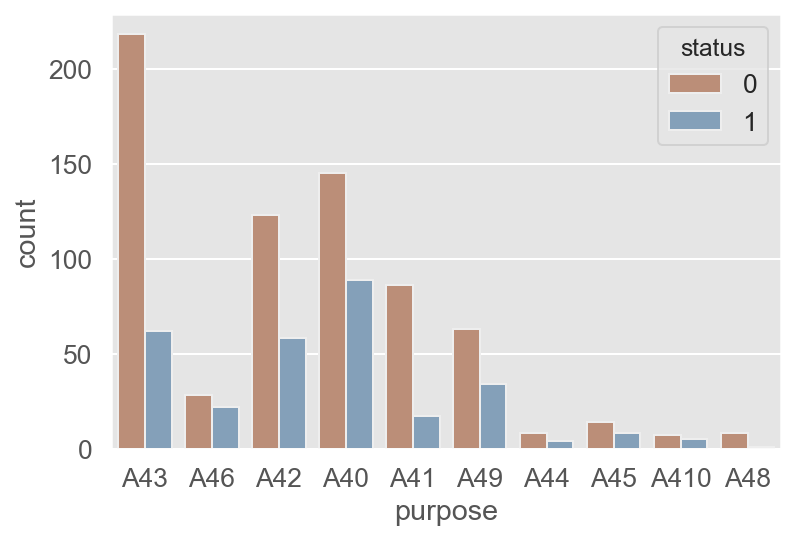

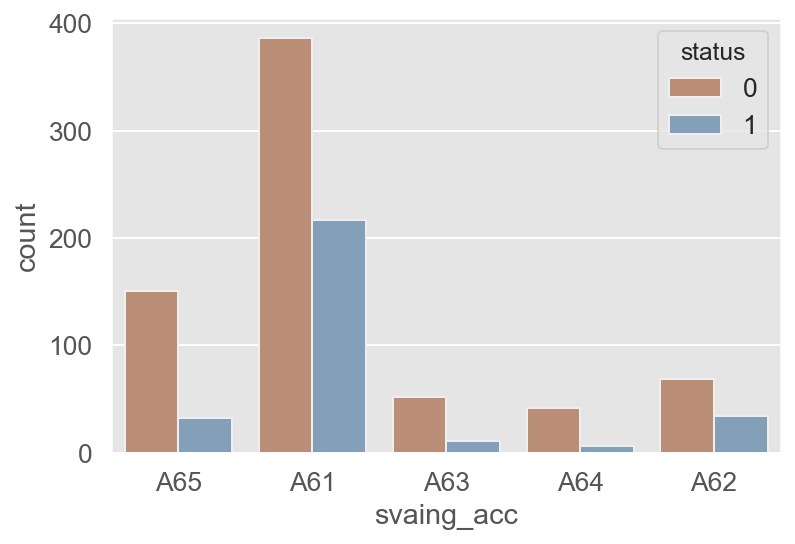

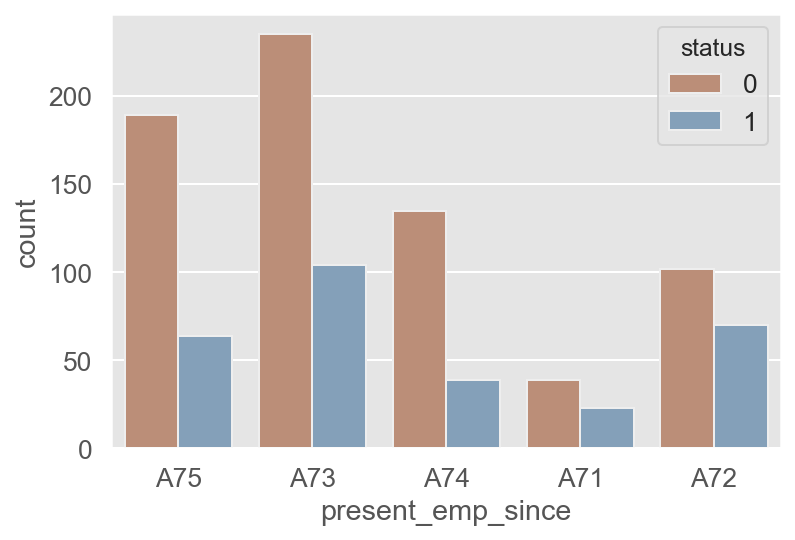

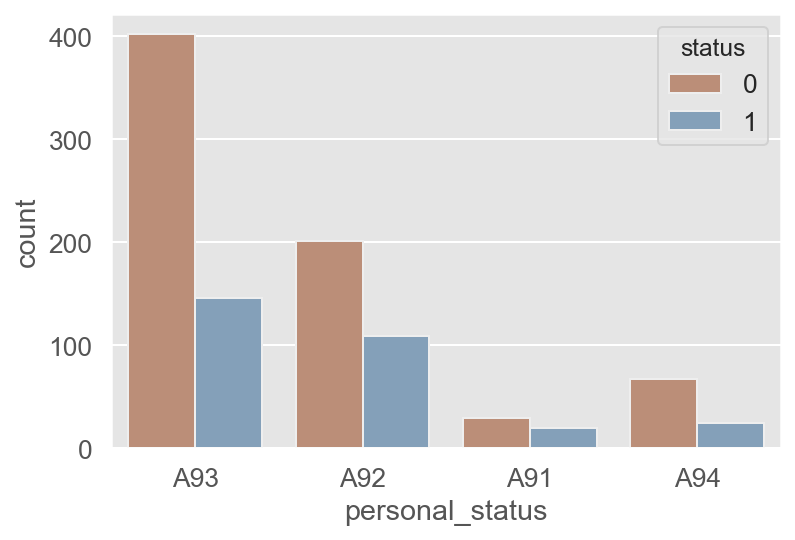

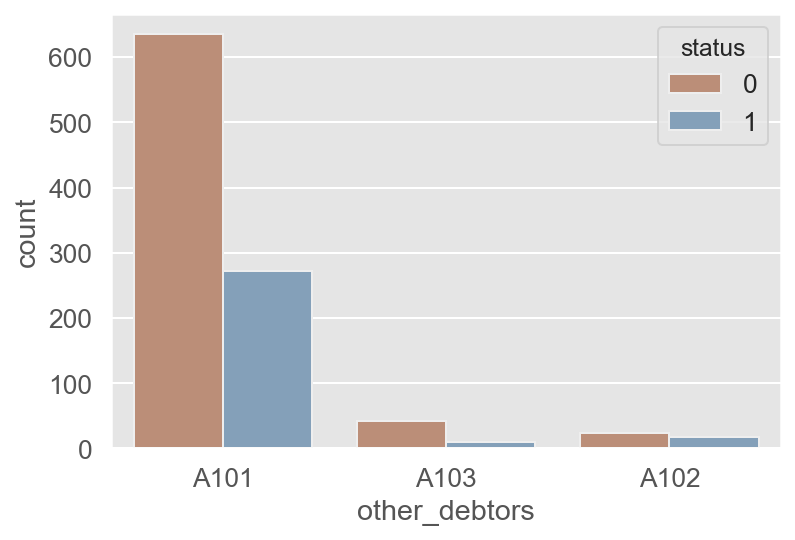

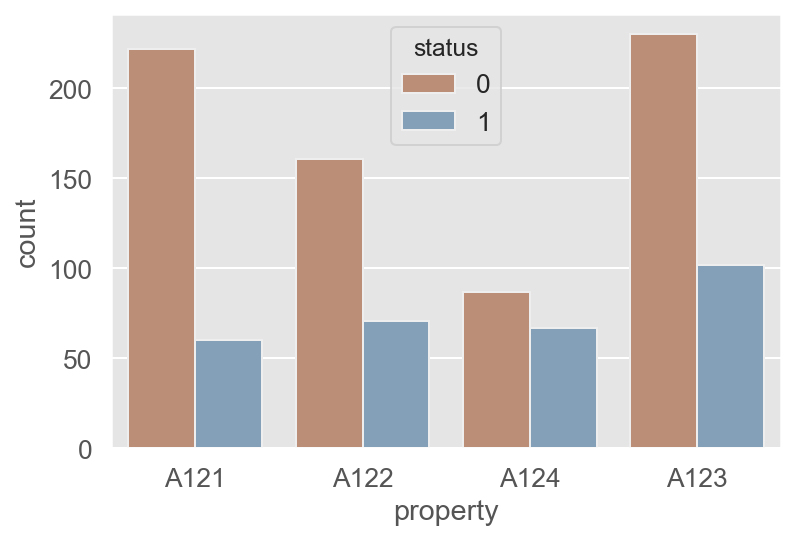

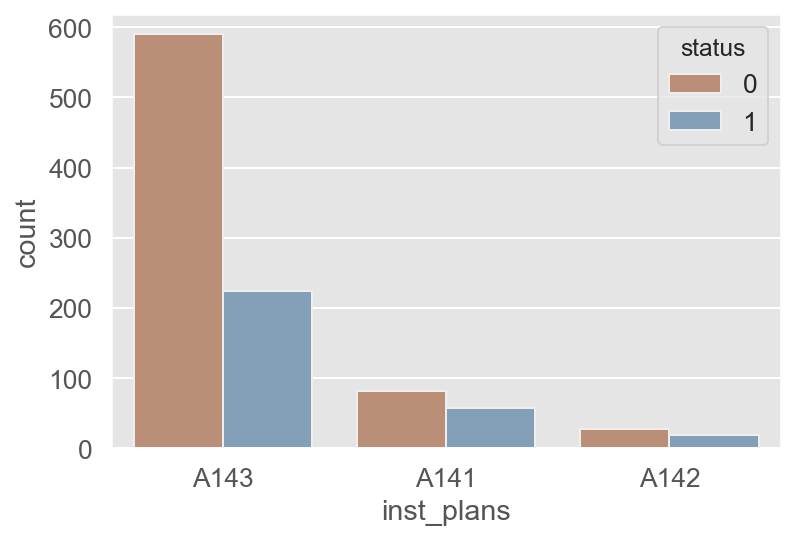

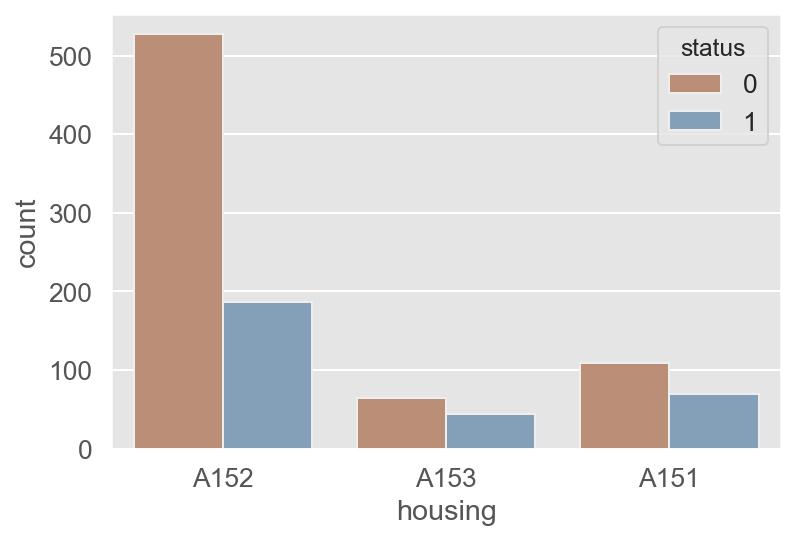

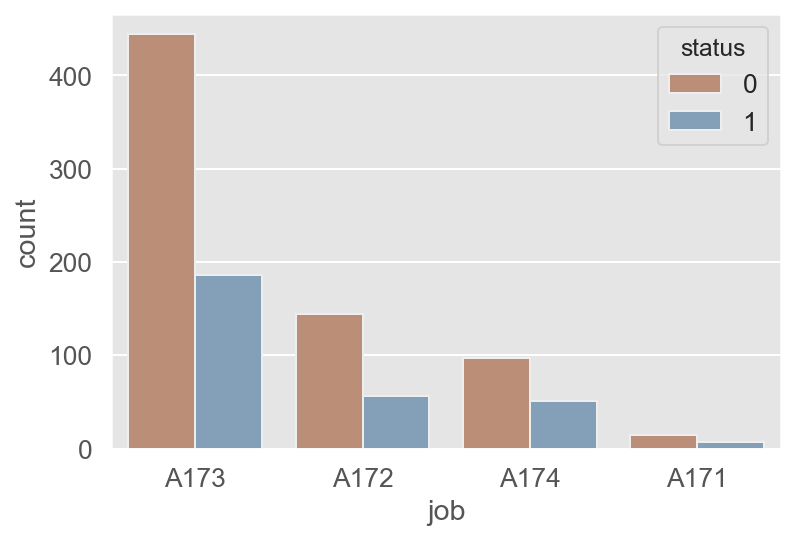

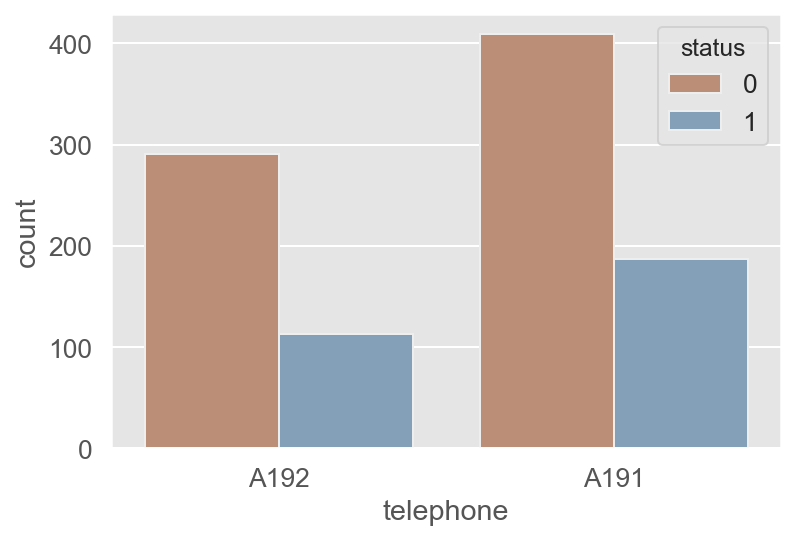

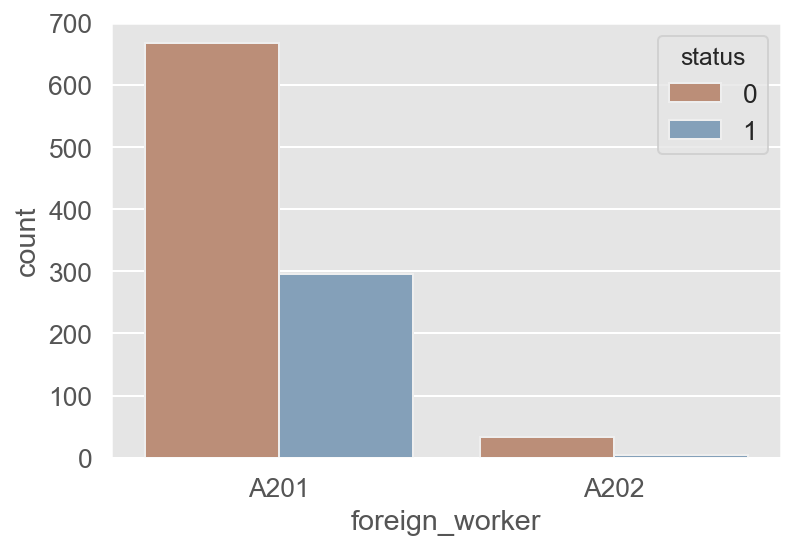

In [389]:
for i in range(len(cat)):
    plt.figure()
    sns.countplot(cat[i], hue="status", data=data, palette="twilight_shifted_r")

- The customers with existing checking account (A14) are less likely to default.
- The higher number of customers who default are the ones who have paid there existing credits back.
- Most of the customers who default have purchased a new car.
- The customers with savings account type A61 (having less than 100 DM account bonds) are more likely to defult.
- The customers who have expererience of 1-4 years in jobs have higher number of defaulters.(A73)
- The distribution of deafulters have higher number of male and female who are single/divorced (A93 A92)
- The customers who deafult at the bank have no other debtors and guarantors (A101).
- The non defaulters have either purchased a new car( A123) or own a real estate. (A121)
- The defaulters as well as non defaulters have no other installment plans( A143).
- Higher number of defaulters have their own house (A152).
- Out of the customers who are skilled or employed , higher number are non defaulters.(A173)
- Large number of customers have telephone registered under their own name with bank.
- Large number of customers in the bank are foreign workers.(A201)

In [390]:
#num=[]
#for i in data.columns:
 #   if bool(is_string_dtype(data[i]))==False:
  #      num.append(i)
#num=num[:-1]
#sns.set_style('whitegrid')

##Violin Plot
#for i in range(len(num)):
    #plt.figure()
 #   sns.violinplot(y='duration', hue='status', data=data,split = True)
  #  sns.swarmplot(x ='duration', y ='status', data = data, color ='black') 
   # plt.legend(loc='best', title= 'Default', facecolor='white')


C:\Users\Shikha.roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


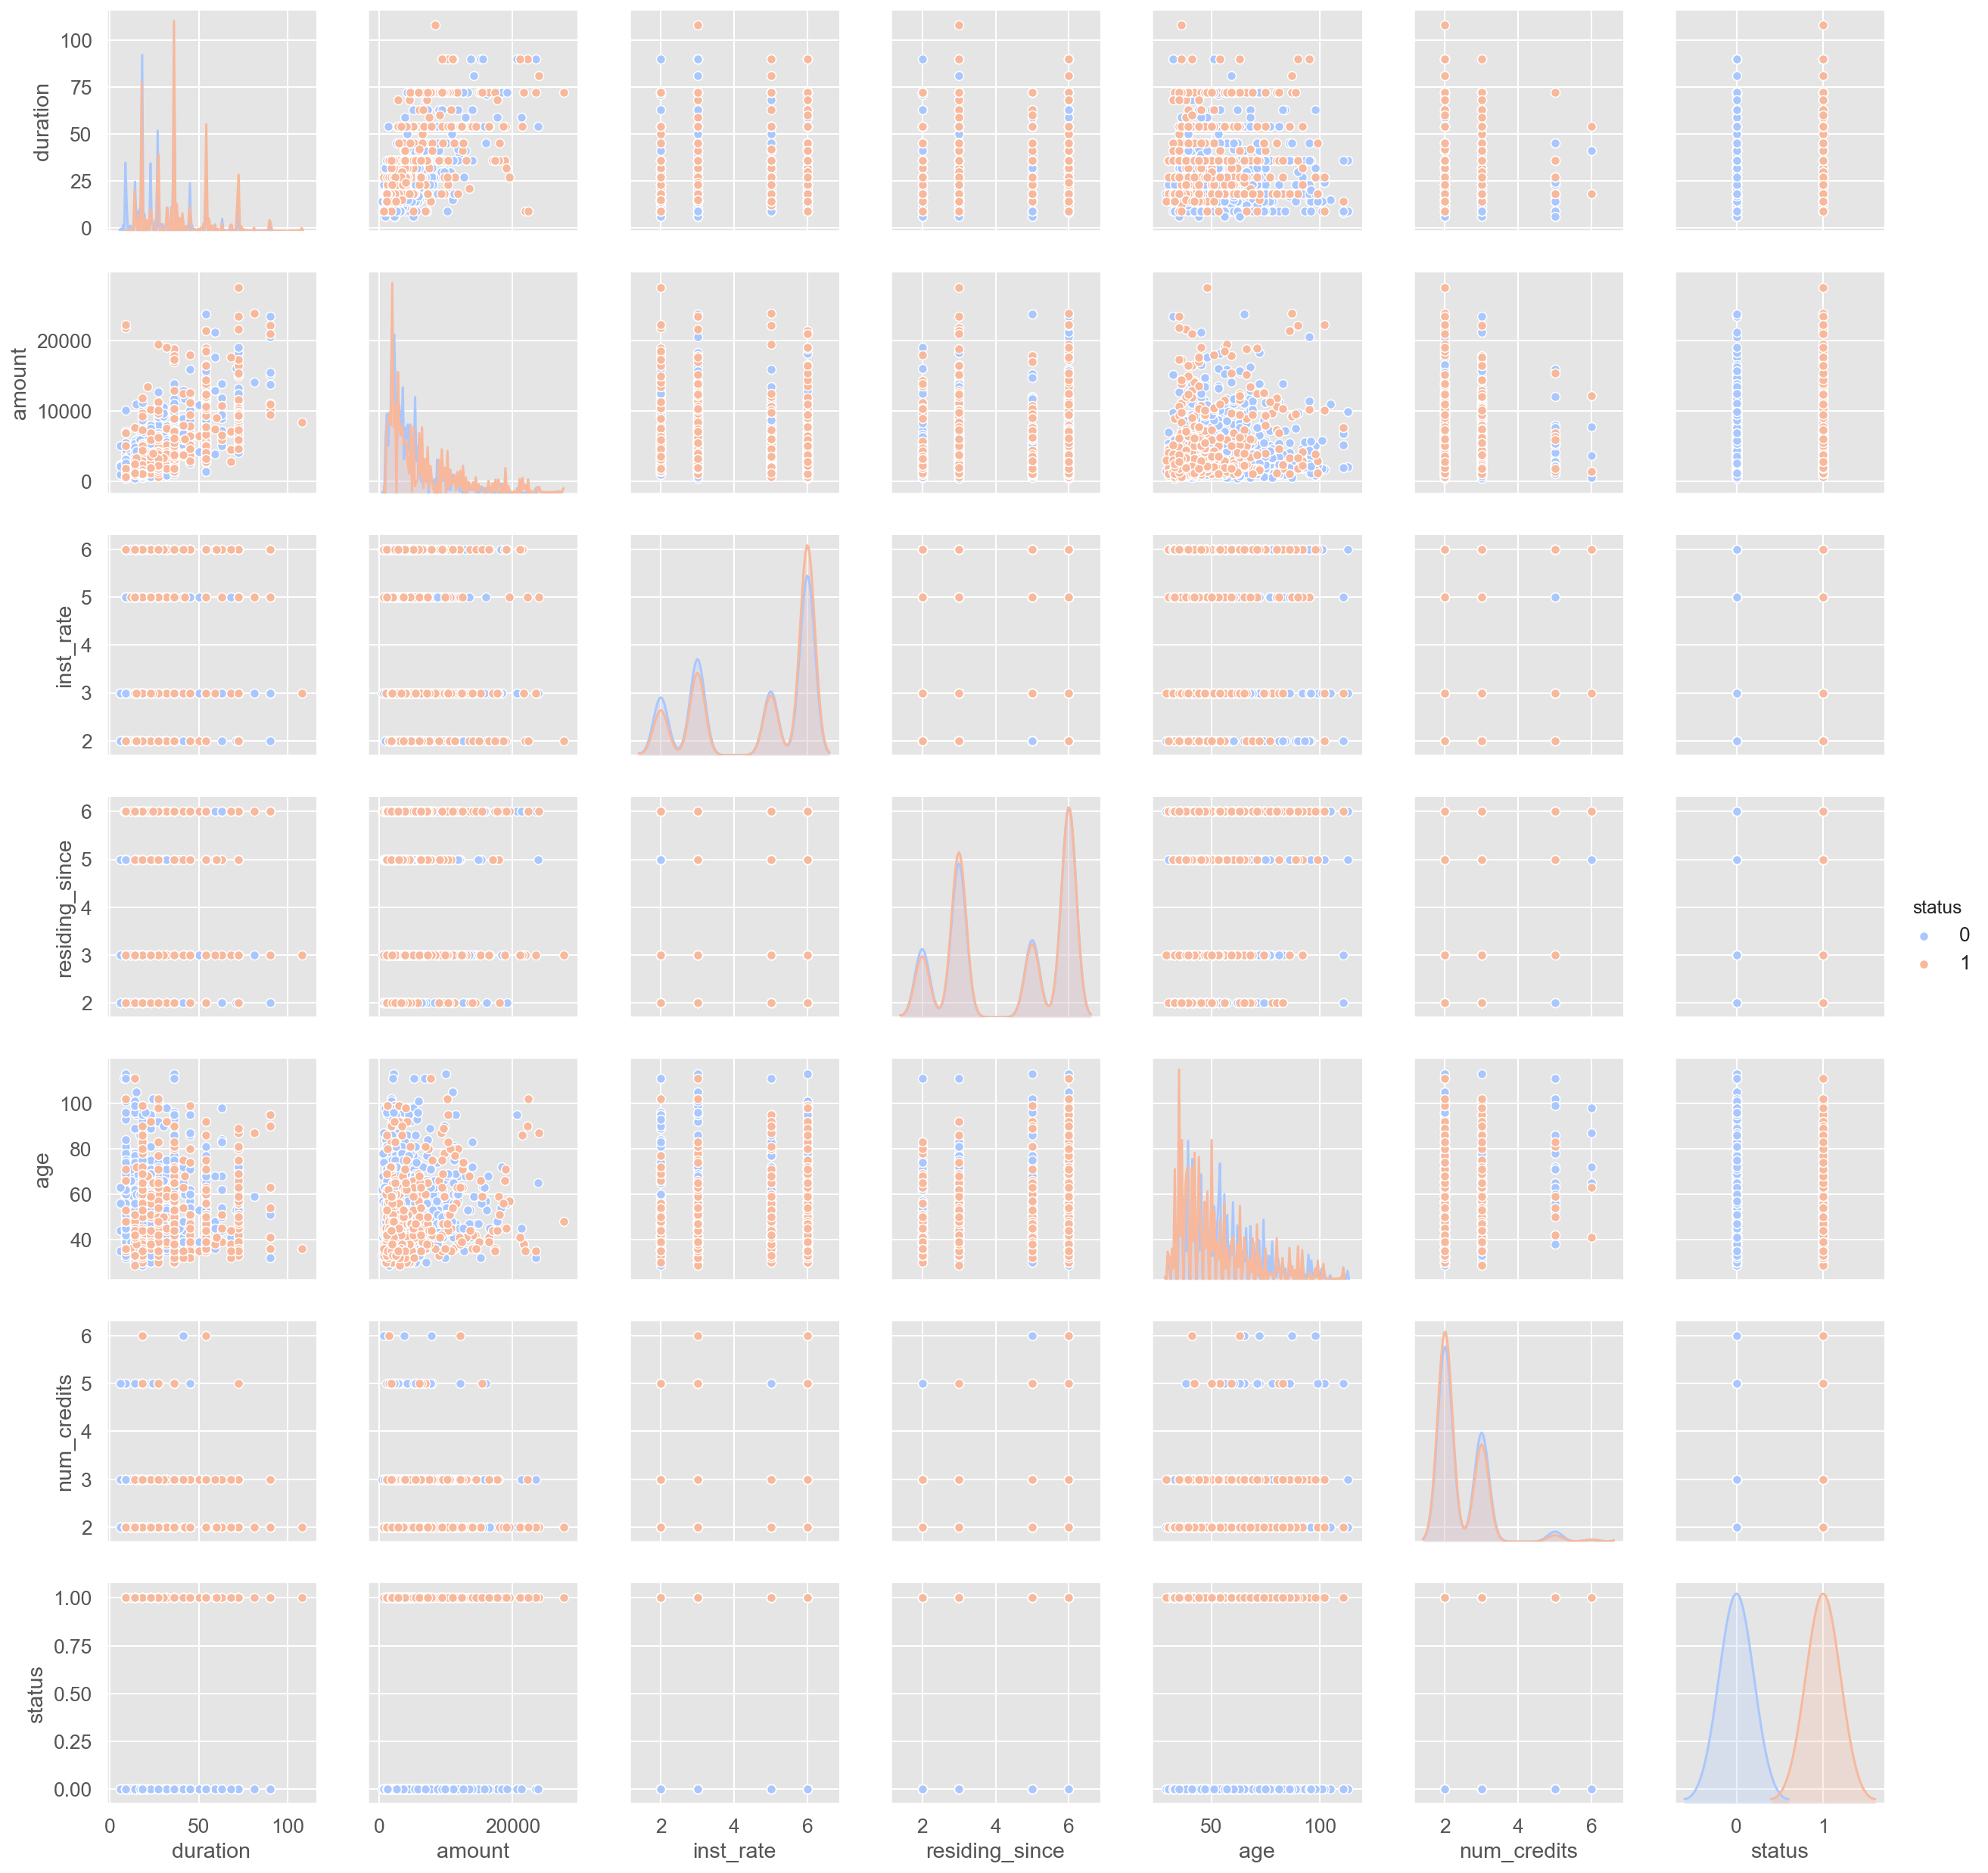

In [391]:
##Pairwise Plot between numerical varaibles bifurcated by status columns,
var1=['duration','amount','inst_rate','residing_since','age','num_credits' ,'status' ]
#var1=['duration','amount','inst_rate' ,'status' ]

data_pair=data[var1]
data_pair['status'] = pd.Categorical(data_pair.status)
sns.pairplot(data_pair, hue ="status", palette ='coolwarm', diag_kws={'bw': 0.2}) 

- The distribution of continuous variable over two categories of status column is depicted on the pairplots.
- Both the curve seems to overlap each other across two categories
- Lets explore more with the jointplot below

In [392]:
##Jointplot between variables to assess the kernel density 

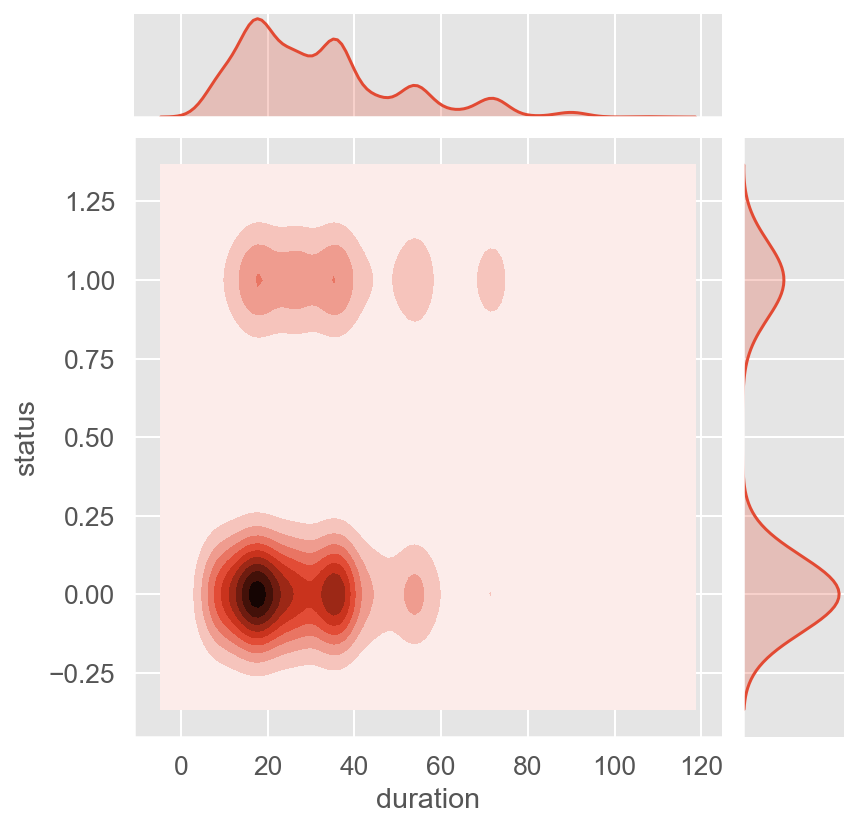

In [773]:
sns.jointplot(x ='duration', y ='status', data = data_pair, kind ='kde') 

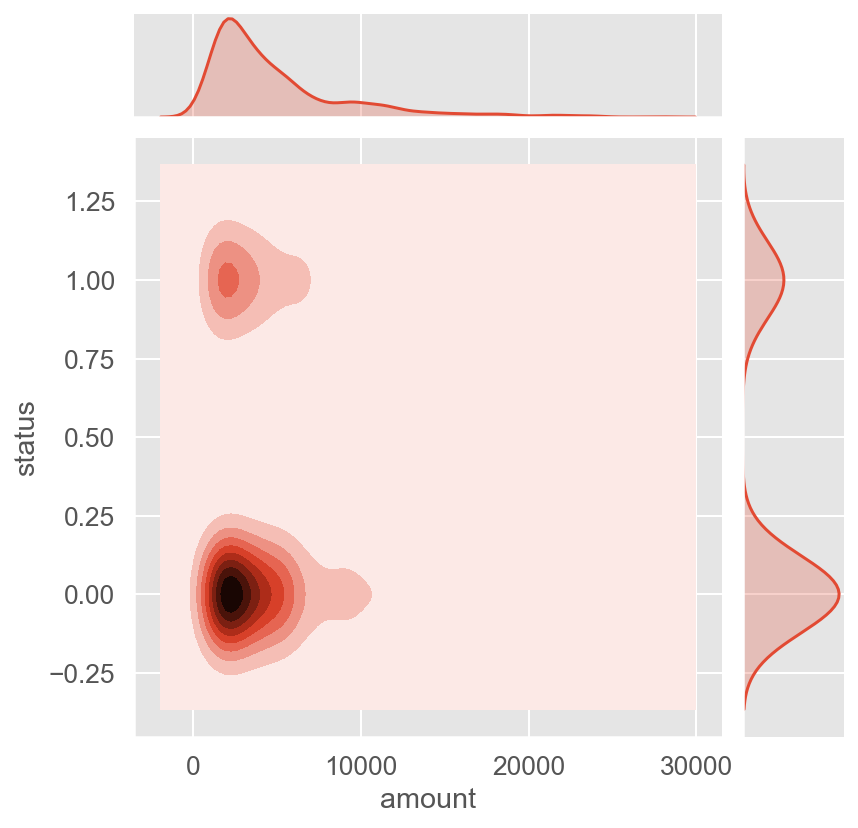

In [394]:
sns.jointplot(x ='amount', y ='status', data = data_pair, kind ='kde') 

- The amount data is skewed towards left and most of the deafulters and non defaulters are clustered between 0-10000 credit carda amount

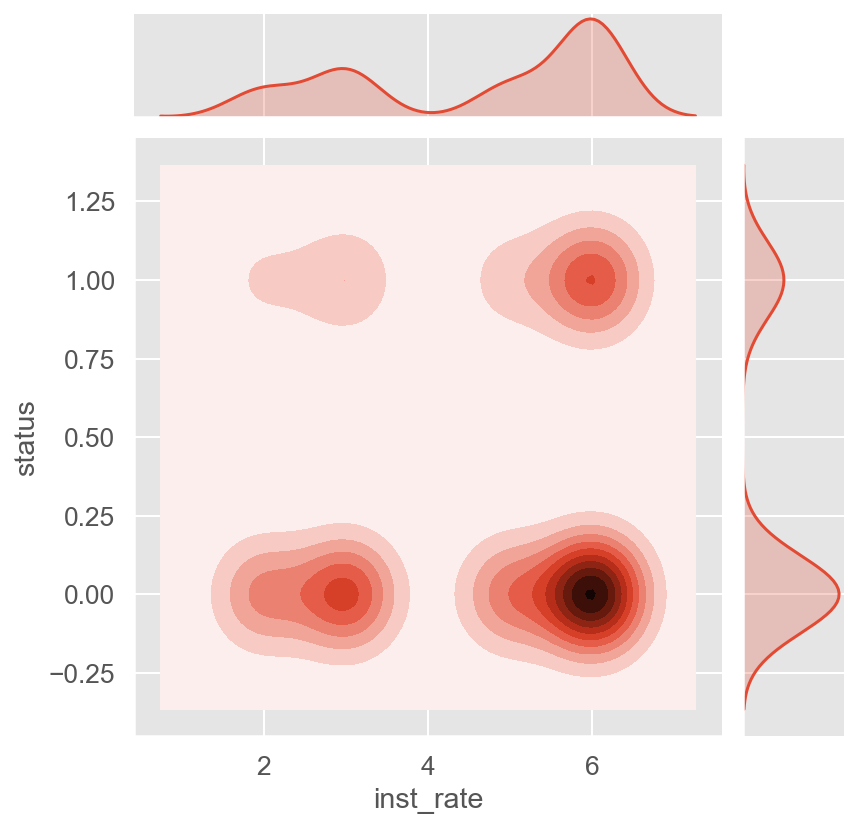

In [395]:
sns.jointplot(x ='inst_rate', y ='status', data = data_pair, kind ='kde') 

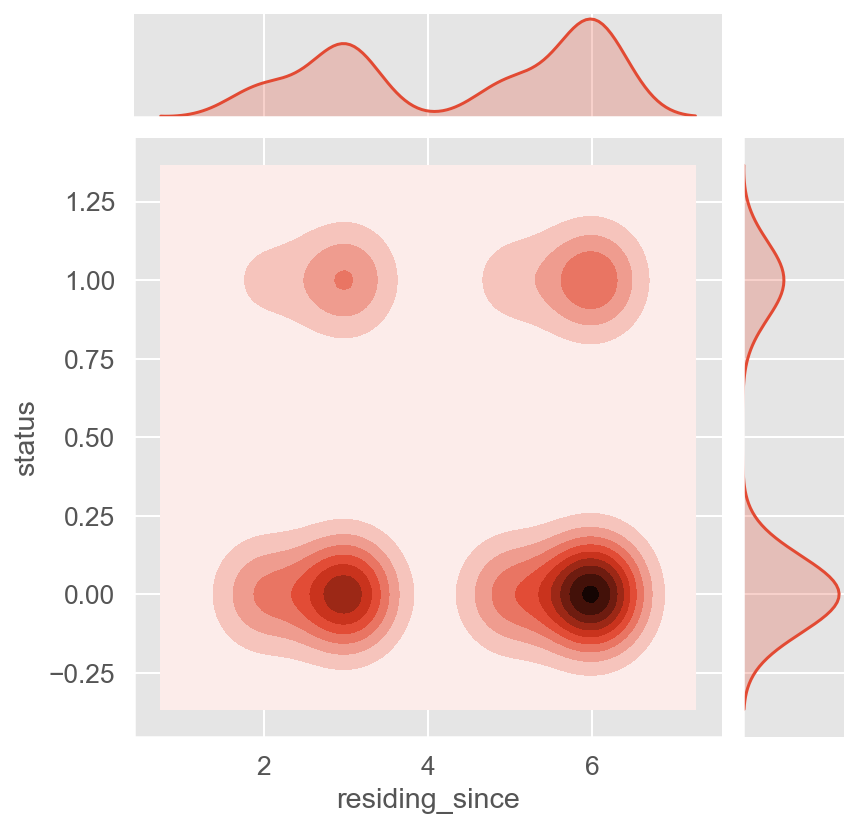

In [396]:
sns.jointplot(x ='residing_since', y ='status', data = data_pair, kind ='kde') 

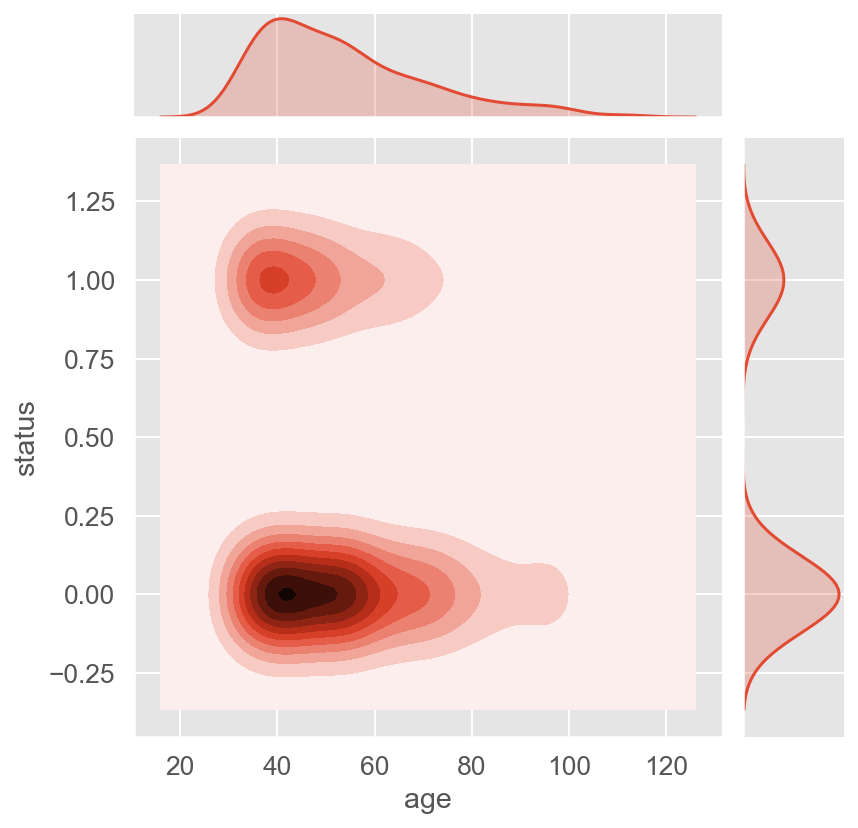

In [397]:
sns.jointplot(x ='age', y ='status', data = data_pair, kind ='kde') 

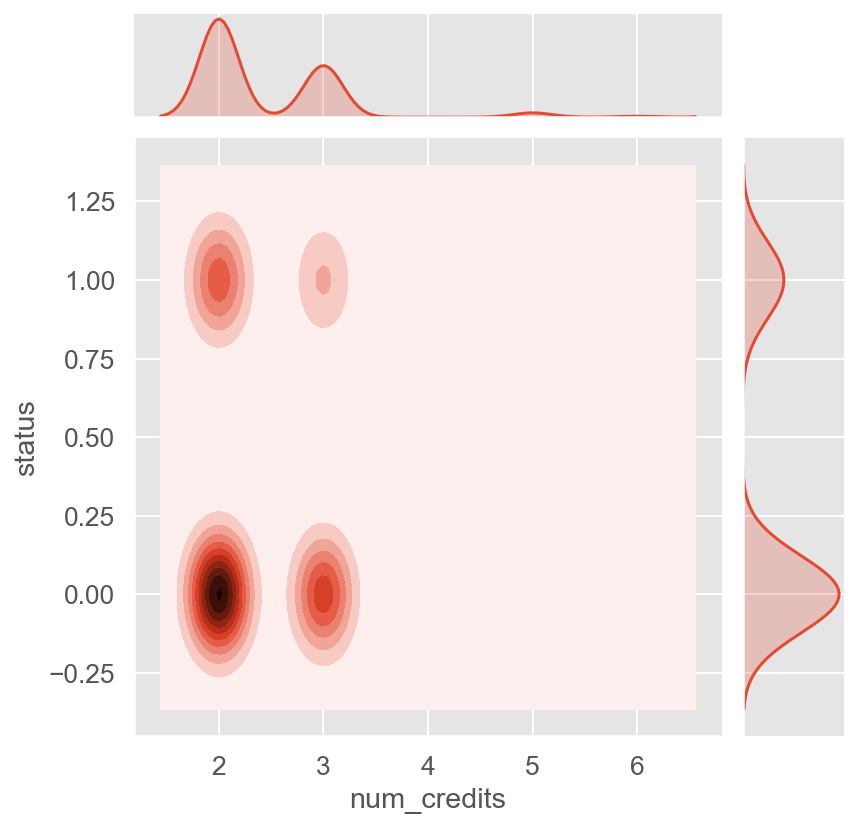

In [398]:
sns.jointplot(x ='num_credits', y ='status', data = data_pair, kind ='kde') 

In [399]:
##Boxplot between numerical variables

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

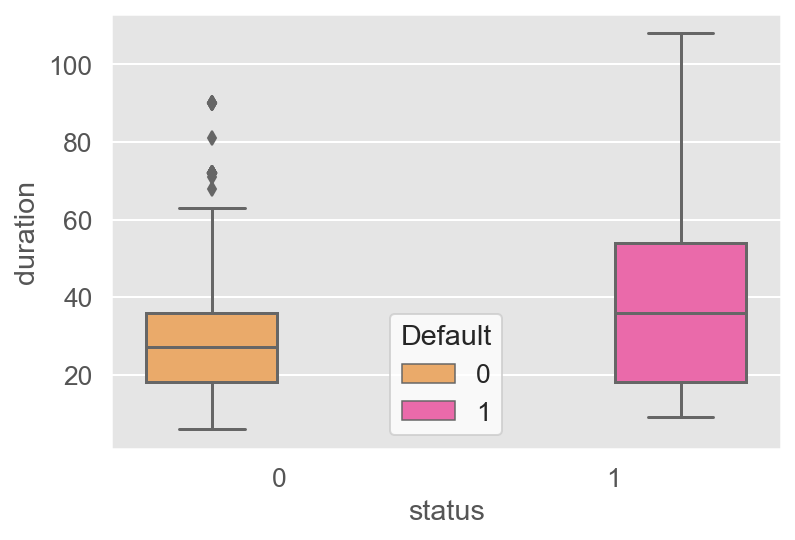

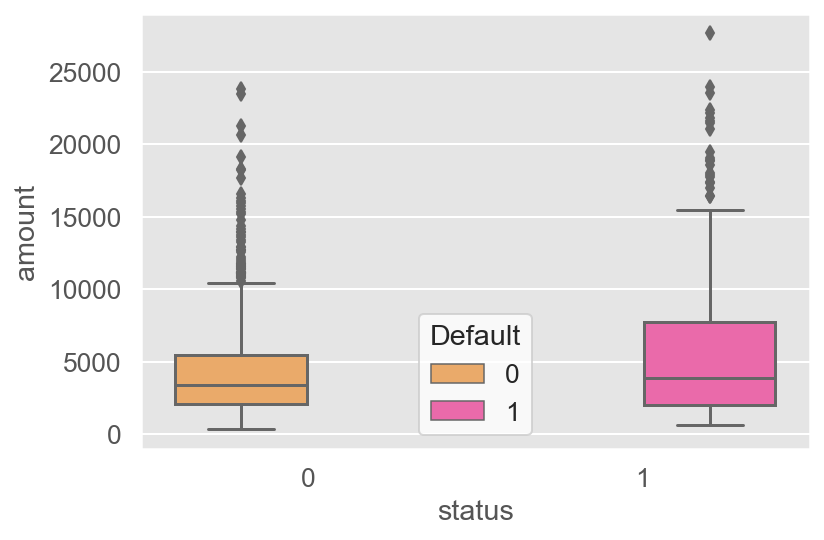

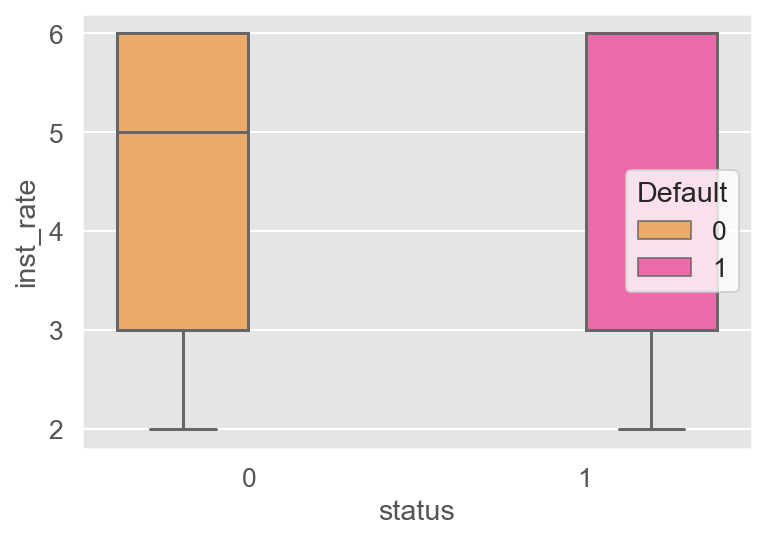

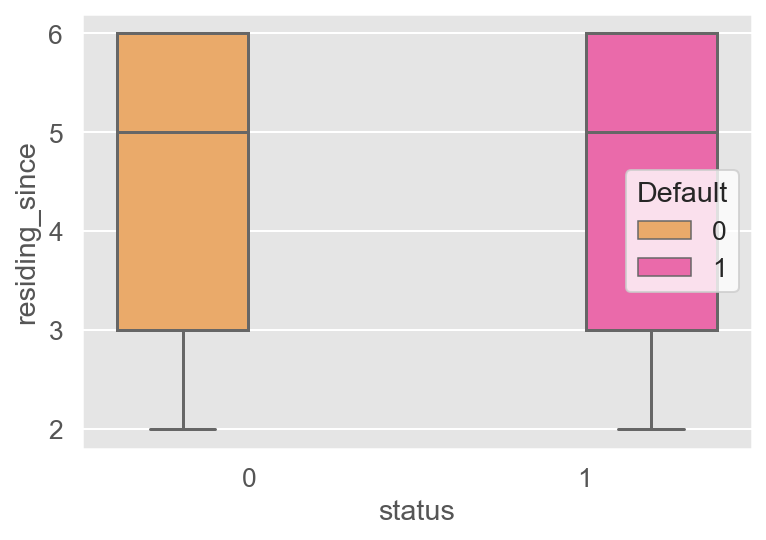

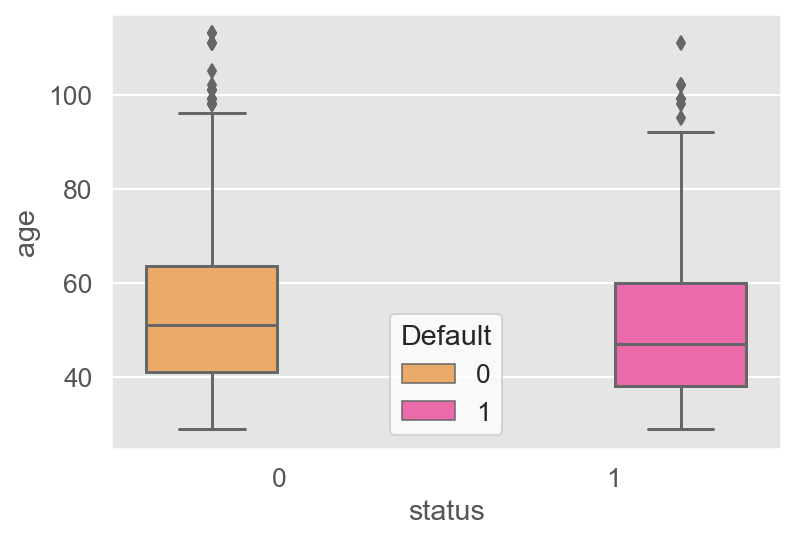

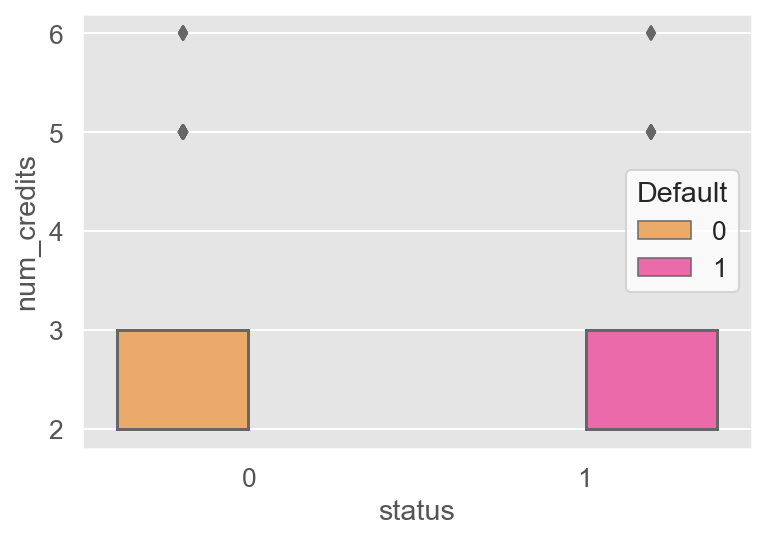

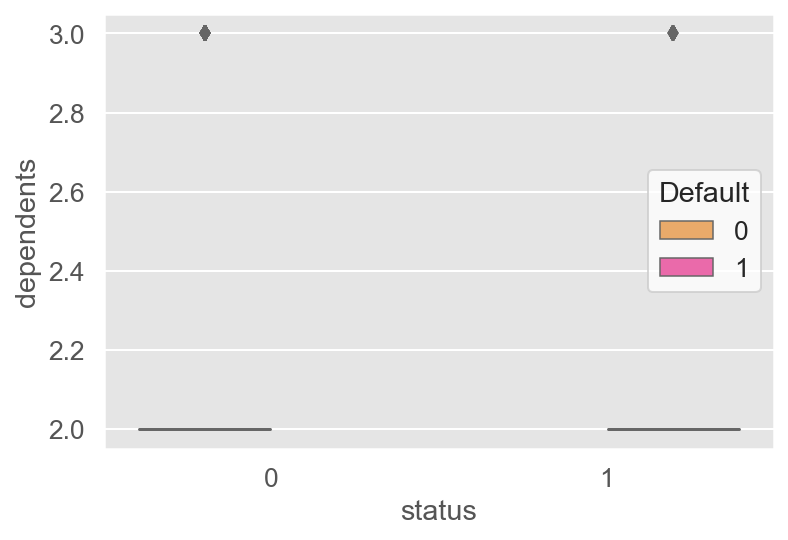

In [400]:
num=[]
for i in data.columns:
    if bool(is_string_dtype(data[i]))==False:
        num.append(i)
num=num[:-1]
for i in range(len(num)):
    plt.figure()
    sns.boxplot(y=num[i],x='status', hue="status", data=data, palette='spring_r')
    plt.legend(loc='best', title= 'Default', facecolor='white')

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

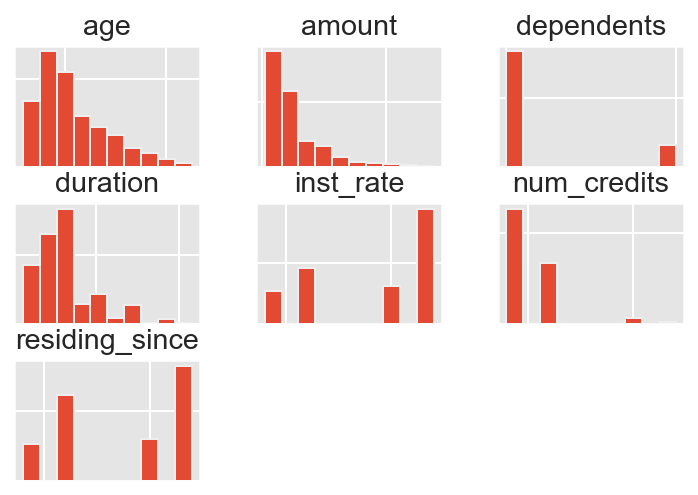

In [401]:
ax = data[num].hist()
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
plt.show()

-The distribution of variables age, amount and duration are rightly skewed.

## 4. Feature Engineering and Data Standardization 

### 1. Making new variables using Weight of Evidence and Information Value

In [38]:
##subsetting data for calculating woe values:
data_woe=data

In [39]:
import numpy as np
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        }) 
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return dset, iv

In [40]:
lst1= []
IV_df = pd.DataFrame(columns=['Variable','IV'])
for col in data_woe.columns:
    if col == 'status': continue
    else:
          df, iv= calculate_woe_iv(data_woe, col, 'status')
    lst1.append(df)
    IV_df = IV_df.append({
                "Variable" :col ,
                "IV" : iv,
                },ignore_index=True)

C:\Users\Shikha.roy\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
IV_df

,Variable,IV
0,checkin_acc,0.666012
1,duration,0.309537
2,credit_history,0.293234
3,purpose,0.169195
4,amount,0.042108
5,svaing_acc,0.196010
6,present_emp_since,0.086434
7,inst_rate,0.026322
8,personal_status,0.044671
9,other_debtors,0.032019


In [42]:

lst1[0]

,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,A11,274,139,135,0.198571,0.450000,-0.818099,0.205693
1,A12,269,164,105,0.234286,0.350000,-0.401392,0.046447
3,A13,63,49,14,0.070000,0.046667,0.405465,0.009461
2,A14,394,348,46,0.497143,0.153333,1.176263,0.404410


- The above represents distribution of checkin_acc  between bad (deafulter) and good (non-defauler) customers.

-  Taking columns with woe values greater than 0.3 that indicates good discriminative power to differentiate between good and bad customers.
- The variables are checkin_acc,duration,credit_history,age

In [43]:
data_checkin_acc= lst1[0]
data_checkin_acc = data_checkin_acc.rename(columns={"Value":"checkin_acc","WoE":"WoEcheckin_acc"})


In [44]:
data= pd.merge(data, data_checkin_acc[['checkin_acc','WoEcheckin_acc']], on='checkin_acc')

In [45]:
data_duration= lst1[1]
data_duration = data_duration.rename(columns={"Value":"duration","WoE":"WoEduration"})


In [46]:
data_credit_history= lst1[2]
data_credit_history = data_credit_history.rename(columns={"Value":"credit_history","WoE":"WoEcredit_history"})


In [47]:
data_age= lst1[12]
data_age = data_age.rename(columns={"Value":"age","WoE":"WoEage"})


In [48]:
data= pd.merge(data, data_duration[['duration','WoEduration']], on='duration')

In [49]:
data= pd.merge(data, data_credit_history[['credit_history','WoEcredit_history']], on='credit_history')

In [50]:
data= pd.merge(data, data_age[['age','WoEage']], on='age')

In [18]:
data.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,num_credits,job,dependents,telephone,foreign_worker,status,WoEcheckin_acc,WoEduration,WoEcredit_history,WoEage
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,3,A173,2,A192,A201,0,-0.818099,1.145132,0.733741,0.000000
1,A12,27,A32,A45,5808,A61,A71,3,A92,A101,...,2,A173,2,A192,A201,0,-0.401392,-0.322288,-0.088319,0.000000
2,A12,14,A32,A46,1799,A61,A74,6,A92,A101,...,3,A174,2,A192,A201,0,-0.401392,0.068993,-0.088319,0.000000
3,A11,9,A34,A40,1290,A61,A75,2,A92,A101,...,3,A173,2,A192,A201,0,-0.818099,1.145132,0.733741,0.068993
4,A11,9,A34,A40,999,A64,A74,5,A92,A101,...,3,A172,2,A192,A201,0,-0.818099,1.145132,0.733741,0.068993


In [51]:
data=data.drop(['checkin_acc','duration','credit_history','age'],axis=1)

### 3. Outlier Capping 

In [52]:
#Capping outlier if any in the amount column

In [53]:
data['amount'] = np.where(data['amount'] <data['amount'].quantile(.05), data['amount'].quantile(.05),data['amount'])

In [54]:
data['amount']  = np.where(data['amount'] >data['amount'].quantile(.95), data['amount'].quantile(.95),data['amount']) 

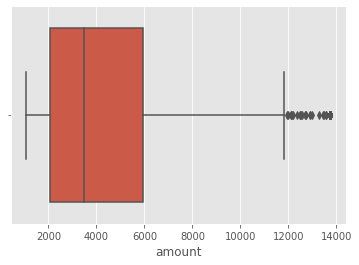

In [23]:
sns.boxplot(x=data['amount'] )

In [24]:
data['amount'].describe()

count     1000.000000
mean      4704.618500
std       3543.109519
min       1063.900000
25%       2048.250000
50%       3479.500000
75%       5958.500000
max      13744.550000
Name: amount, dtype: float64

### 3. One Hot Encoding

In [55]:
# perform one hot encoding with k - 1, it automatically drop the first.
#not ordinal variables
one_hot_enc=pd.get_dummies(data[['purpose','svaing_acc','present_emp_since','personal_status','other_debtors',  'property', 'inst_plans', 'housing','job', 'telephone', 'foreign_worker']])

In [56]:
data=pd.concat([data,one_hot_enc],axis=1)

In [27]:
data.head()

,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,inst_plans,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,A43,1754.0,A65,A75,6,A93,A101,6,A121,A143,...,1,0,0,0,1,0,0,1,1,0
1,A45,5808.0,A61,A71,3,A92,A101,6,A123,A143,...,1,0,0,0,1,0,0,1,1,0
2,A46,1799.0,A61,A74,6,A92,A101,6,A122,A143,...,1,0,0,0,0,1,0,1,1,0
3,A40,1290.0,A61,A75,2,A92,A101,6,A124,A143,...,1,0,0,0,1,0,0,1,1,0
4,A40,1063.9,A64,A74,5,A92,A101,6,A121,A143,...,1,0,0,1,0,0,0,1,1,0


In [57]:
#saving unstandardized data
data1=data

In [58]:
data=data.drop(['purpose','svaing_acc','present_emp_since','personal_status','other_debtors',  'property', 'inst_plans', 'housing','job', 'telephone', 'foreign_worker'],axis=1)

In [59]:
varlist=data.columns.difference(['status'])

### 4. Data Standardization

In [60]:
data[varlist]=data[varlist].apply(lambda x: (x-min(x))/(max(x)-min(x)))

## 5. Model Building

### 1. Splitting Data into Train and Test

In [61]:
train,val=train_test_split(data,test_size=0.3,random_state =123)

In [34]:
train.shape

(700, 55)

In [62]:
#predictors and dependent for train data
X=train[varlist]
Y=train.iloc[:,5]

In [63]:
#predictors and dependent for validation data
X_val=val[varlist]
Y_val=val.iloc[:,5]

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [448]:
1/300

0.0033333333333333335

In [449]:
1/700

0.0014285714285714286

## 2. Random Forest Model 

In [450]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 6)]
#n_estimators=[25,50]
# Number of features to consider at every split
max_features = [15,'auto','sqrt']
#max_features = [20, 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth=[5,7,10]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
#min_samples_split = [10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
min_samples_leaf= [5,10,15]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
#n_jobs= -1, 
oob_score= [True]
class_weight=[{0:0.001,1:0.003},{0:1,1:1},{0:1,1:2},{0:1,1:10}]

In [451]:
6*3*3*3*3*4*5

9720

In [452]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
             'oob_score':oob_score,
              'class_weight':class_weight}

In [453]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [454]:
# Fit the grid search to the data
grid_search.fit(X, Y)


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 50.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 90.6min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 124.0min
[Parallel(n_jobs=-1)]: Done 9097 tasks      |

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [{0: 0.001, 1: 0.003}, {0: 1

In [455]:
best_RF = grid_search.best_estimator_

In [ ]:
filename = 'Model_best_RF.sav'
pickle.dump(best_RF, open(filename, 'wb'))
RF_model_final = pickle.load(open(filename, 'rb'))

In [64]:
import pickle
RF_model_final = pickle.load(open(filename, 'rb'))

In [537]:
score= RF_model_final.score(X, Y)
score_test= RF_model_final.score(X_val, Y_val)

- The accuracy score on the training data is 86% 
- The accuracy score on the training data is 78% 

In [105]:
# Predcited probability of each class.
y_pred_prob_RF = RF_model_final.predict_proba(X_val)
# Predicted value of each class
y_pred_class_RF = RF_model_final.predict(X_val)

print(metrics.classification_report(Y_val, y_pred_class_RF))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       198
           1       0.78      0.77      0.78       102

    accuracy                           0.85       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.85      0.85      0.85       300



In [106]:
prediction_class_RF=pd.DataFrame(y_pred_class_RF)
Y_val1= Y_val.reset_index()
final_test_pred_RF = pd.concat([Y_val1,pd.DataFrame(y_pred_prob_RF, columns=['Col_0', 'Col_1']),prediction_class_RF], axis=1)
final_test_pred_RF.to_csv("final_test_pred_RF1.csv")

In [461]:
best_RF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [462]:
from sklearn.inspection import permutation_importance
r = permutation_importance(RF_model_final, X, Y,n_repeats=5,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data.columns[i]:<8}"f"{r.importances_mean[i]:.3f}"f" +/- {r.importances_std[i]:.3f}")

inst_rate0.070 +/- 0.005
num_credits0.026 +/- 0.013
residing_since0.023 +/- 0.008
amount  0.020 +/- 0.004
property_A1210.012 +/- 0.004
WoEcredit_history0.010 +/- 0.003
svaing_acc_A630.008 +/- 0.002
foreign_worker_A2010.005 +/- 0.002
purpose_A400.002 +/- 0.001


In [463]:
r = permutation_importance(RF_model_final, X_val, Y_val,n_repeats=5,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data.columns[i]:<8}"f"{r.importances_mean[i]:.3f}"f" +/- {r.importances_std[i]:.3f}")

inst_rate0.098 +/- 0.019
residing_since0.034 +/- 0.012
purpose_A420.019 +/- 0.006
purpose_A490.017 +/- 0.006
inst_plans_A1430.015 +/- 0.005
num_credits0.015 +/- 0.005
personal_status_A930.009 +/- 0.003
status  0.008 +/- 0.003
present_emp_since_A720.006 +/- 0.002


## 3. XGBOOST Model

In [464]:
#XGBOOST
import xgboost as xgb
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [465]:
param_grid_xg = {'n_estimators': [640,800,1000],
               'max_depth': [7,15],
               'gamma': [0.01,.1],
                'reg_alpha' : [0.1,1],
                 'reg_lambda' : [0.1,1],
                 'colsample_bytree' : [.5,1],
                 'min_child_weight' : [5,10],
              'scale_pos_weight':[2,2.5,3],
                'eta':[0.2,.3,.1]}

In [466]:
3*2*2*2*2*2*2*3*3*5

8640

In [467]:
xg_grid = GridSearchCV(estimator = XGBClassifier(objective= 'binary:logistic'), param_grid = param_grid_xg, scoring='roc_auc',n_jobs=-1, cv=5,verbose = 2)


In [468]:
# Fit the grid search to the data
xg_grid.fit(X, Y)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 51.8min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 62.9min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | 

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1], 'eta': [0.2, 0.3, 0.1],
                         'gamma': [0.01, 0.1], 'max_depth': [7, 15],
             

In [469]:
best_xg = xg_grid.best_estimator_

In [470]:
filename = 'Model_best_xgboost.sav'
pickle.dump(best_xg, open(filename, 'wb'))


In [65]:
filename = 'Model_best_xgboost.sav'
xgboost_model_final = pickle.load(open(filename, 'rb'))

In [472]:
score= xgboost_model_final.score(X, Y)
print(score)

0.9971428571428571


In [473]:
score_test= xgboost_model_final.score(X_val, Y_val)
print(score_test)

0.7466666666666667


- Getitng 100 % accuracy on the training data indicates overfitting hence fine tuning again.

In [474]:
xgboost_model_final

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.2, gamma=0.01,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=640, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=2, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Iteration 2 : XG Model

In [475]:
param_grid_xg2 = {'n_estimators': [100,640],
               'max_depth': [5,6,7],
               'gamma': [0.001,.01],
                'reg_alpha' : [1,2],
                 'reg_lambda' : [0.01,.1,],
                 'colsample_bytree' : [.6,.5],
                 'min_child_weight' : [1,2],
              'scale_pos_weight':[2],
                'eta':[0.01,.001]}

In [476]:
xg_grid_iter2 = GridSearchCV(estimator = XGBClassifier(objective= 'binary:logistic'), param_grid = param_grid_xg2, scoring='roc_auc',n_jobs=-1, cv=5,verbose = 2)


In [477]:
xg_grid_iter2.fit(X, Y)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 11.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.5], 'eta': [0.01, 0.001],
                         'gamma': [0.001, 0.01], 'max_depth': [5, 6, 7],
         

In [478]:
xg_iter2=xg_grid_iter2.best_estimator_
score= xg_iter2.score(X, Y)
print(score)

0.8828571428571429


In [479]:
score= xg_iter2.score(X_val, Y_val)
print(score)

0.79


In [480]:
xg_iter2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.001, gamma=0.001,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.00100000005, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=2,
              reg_lambda=0.1, scale_pos_weight=2, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [481]:
filename = 'Model_best_xgboost_iter2.sav'
pickle.dump(xg_iter2, open(filename, 'wb'))


In [66]:
filename = 'Model_best_xgboost_iter2.sav'
xgboost_model_final_iter2 = pickle.load(open(filename, 'rb'))

In [97]:
# Predcited probability of each class.
y_pred_prob_XG = xgboost_model_final_iter2.predict_proba(X_val)
# Predicted value of each class
y_pred_class_XG = xgboost_model_final_iter2.predict(X_val)

print(metrics.classification_report(Y_val, y_pred_class_XG))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       198
           1       0.75      0.57      0.65       102

    accuracy                           0.79       300
   macro avg       0.78      0.74      0.75       300
weighted avg       0.79      0.79      0.78       300



In [98]:
prediction_class_XG=pd.DataFrame(y_pred_prob_XG)
final_test_pred_XG = pd.concat([pd.DataFrame(y_pred_prob_XG, columns=['Col_0', 'Col_1']),prediction_class_XG], axis=1)
final_test_pred_XG.to_csv("final_test_pred_XG1.csv")

In [486]:
from sklearn.inspection import permutation_importance
r = permutation_importance(xgboost_model_final_iter2, X, Y,n_repeats=5,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data.columns[i]:<8}"f"{r.importances_mean[i]:.3f}"f" +/- {r.importances_std[i]:.3f}")

inst_rate0.084 +/- 0.009
num_credits0.054 +/- 0.005
dependents0.035 +/- 0.006
job_A1710.033 +/- 0.004
amount  0.027 +/- 0.007
residing_since0.022 +/- 0.004
housing_A1530.008 +/- 0.003
other_debtors_A1030.007 +/- 0.003
property_A1210.005 +/- 0.001
purpose_A420.005 +/- 0.002
svaing_acc_A630.005 +/- 0.002
present_emp_since_A710.004 +/- 0.002
telephone_A1920.002 +/- 0.001
present_emp_since_A740.002 +/- 0.001


In [487]:
r = permutation_importance(xgboost_model_final_iter2, X_val, Y_val,n_repeats=5,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data.columns[i]:<8}"f"{r.importances_mean[i]:.3f}"f" +/- {r.importances_std[i]:.3f}")

inst_rate0.080 +/- 0.019
num_credits0.053 +/- 0.010
job_A1710.035 +/- 0.012
dependents0.031 +/- 0.001
residing_since0.027 +/- 0.011
personal_status_A930.017 +/- 0.005
other_debtors_A1030.013 +/- 0.004
telephone_A1920.011 +/- 0.002
present_emp_since_A710.011 +/- 0.005
housing_A1530.010 +/- 0.004
job_A1720.008 +/- 0.002
present_emp_since_A740.006 +/- 0.002
purpose_A490.005 +/- 0.002
svaing_acc_A610.005 +/- 0.003
purpose_A480.005 +/- 0.002
WoEcredit_history0.005 +/- 0.003
foreign_worker_A2010.005 +/- 0.003
WoEage  0.005 +/- 0.002
purpose_A460.005 +/- 0.002
svaing_acc_A640.003 +/- 0.000


## 3. ADABOOST

In [488]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
param_grid_ada = {'n_estimators': [100,400,640,1000],
                'learning_rate':[0.01,.001,.0001]}
adb= AdaBoostClassifier()
adb_grid = GridSearchCV(estimator = adb, param_grid=param_grid_ada,scoring='roc_auc',n_jobs=-1, cv=10,verbose = 2)
adb_grid.fit(X, Y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001, 0.0001],
                         'n_estimators': [100, 400, 640, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [492]:
filename = 'Model_best_adaboost.sav'
pickle.dump(ada_best, open(filename, 'wb'))


In [67]:
filename = 'Model_best_adaboost.sav'
Model_best_adaboost = pickle.load(open(filename, 'rb'))

In [494]:
score= Model_best_adaboost.score(X, Y)
print(score)

0.7742857142857142


In [496]:
score_test= Model_best_adaboost.score(X_val, Y_val)
print(score_test)

0.7133333333333334


In [90]:
# Predcited probability of each class.
y_pred_prob_ADA = Model_best_adaboost.predict_proba(X_val)
# Predicted value of each class
y_pred_class_ADA = Model_best_adaboost.predict(X_val)

print(metrics.classification_report(Y_val, y_pred_class_ADA))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       198
           1       0.75      0.24      0.36       102

    accuracy                           0.71       300
   macro avg       0.73      0.60      0.59       300
weighted avg       0.72      0.71      0.66       300



In [91]:
prediction_class_ADA=pd.DataFrame(y_pred_prob_ADA)
final_test_pred_ADA = pd.concat([val, pd.DataFrame(y_pred_prob_ADA, columns=['Col_0', 'Col_1']),prediction_class_ADA], axis=1)
final_test_pred_ADA.to_csv("final_test_pred_ADABOOST1.csv")

## 4.Logistic Regression

In [68]:
##Importing Logistic Regression Final Model
filename = 'Model_best_logistic.sav'
log_model_final = pickle.load(open(filename, 'rb'))


In [99]:
# Predcited probability of each class.
y_pred_prob_LOG = log_model_final.predict_proba(X_val)
# Predicted value of each class
y_pred_class_LOG = log_model_final.predict(X_val)

print(metrics.classification_report(Y_val, y_pred_class_LOG))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       198
           1       0.64      0.76      0.70       102

    accuracy                           0.77       300
   macro avg       0.75      0.77      0.76       300
weighted avg       0.79      0.77      0.78       300



In [100]:
prediction_class_LOG=pd.DataFrame(y_pred_prob_LOG)
final_test_pred_LOG = pd.concat([val, pd.DataFrame(y_pred_prob_LOG, columns=['Col_0', 'Col_1']),prediction_class_LOG], axis=1)
final_test_pred_LOG.to_csv("final_test_pred_LOG1.csv")

# 5. ENSEMBLE MODEL

### Taking average of all models

In [76]:
from sklearn.ensemble import VotingClassifier
final_ensemble = VotingClassifier(estimators=[('log_model_final', log_model_final), ('RF_model_final', RF_model_final),('xgboost_model_final_iter2',xgboost_model_final_iter2),('Model_best_adaboost',Model_best_adaboost)],voting='soft')

In [77]:
final_ensemble.fit(X, Y)
score= final_ensemble.score(X, Y)
print(score)

C:\Users\Shikha.roy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


0.8271428571428572


In [78]:
score_test= final_ensemble.score(X_val, Y_val)
print(score_test)

0.7466666666666667


### Taking weighted average of all models

In [79]:
##weigheted classifier
final_ensemble_weights = VotingClassifier(estimators=[('lr', log_model_final), ('rf', RF_model_final),('xgb',xgboost_model_final_iter2),('adb',Model_best_adaboost)],voting='soft', weights=[1, 2, 2,1])

In [80]:
final_ensemble_weights.fit(X, Y)
score= final_ensemble_weights.score(X, Y)
print(score)

C:\Users\Shikha.roy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


0.8457142857142858


In [81]:
score_test= final_ensemble.score(X_val, Y_val)
print(score_test)

0.7466666666666667


### AVG ENSEMBLE ANALYSIS

In [82]:
# Predcited probability of each class.
y_pred_prob_AVGENSEMB = final_ensemble.predict_proba(X_val)
# Predicted value of each class
y_pred_class_AVGENSEMB = final_ensemble.predict(X_val)

print(metrics.classification_report(Y_val, y_pred_class_AVGENSEMB))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       198
           1       0.74      0.39      0.51       102

    accuracy                           0.75       300
   macro avg       0.74      0.66      0.67       300
weighted avg       0.75      0.75      0.72       300



In [101]:
##EXPORTING The output of the test data
prediction = pd.DataFrame(y_pred_prob_AVGENSEMB)
prediction_class_AVGENSEMB=pd.DataFrame(y_pred_class_AVGENSEMB)
#final=pd.concat(prediction,prediction_class)
#prediction = pd.DataFrame(y_pred_prob, columns=['y_pred_prob']).to_csv('prediction.csv')

In [102]:
final_test_pred = pd.concat([pd.DataFrame(y_pred_prob_AVGENSEMB, columns=['Col_0', 'Col_1']),prediction_class_AVGENSEMB], axis=1)
final_test_pred.to_csv("final_test_pred_avg_ensebmle.csv")

### WEIGHTED AVG ENSEMBLE

In [103]:
# Predcited probability of each class.
y_pred_prob_WAVGENSEMB = final_ensemble_weights.predict_proba(X_val)
# Predicted value of each class
y_pred_class_WAVGENSEMB = final_ensemble_weights.predict(X_val)

print(metrics.classification_report(Y_val, y_pred_class_WAVGENSEMB))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       198
           1       0.74      0.41      0.53       102

    accuracy                           0.75       300
   macro avg       0.74      0.67      0.68       300
weighted avg       0.75      0.75      0.73       300



# 6. STACKING ENSEMBLE 

In [86]:
#multilayer stacking
from sklearn.ensemble import StackingClassifier
final_layer = StackingClassifier(
estimators=[('adb',Model_best_adaboost),
('xgb',xgboost_model_final_iter2),('lr', log_model_final)],
final_estimator=RF_model_final)


final_layer.fit(X, Y)
#print('R2 score: {:.2f}'.format(multi_layer_regressor.score(X_test, y_test))

C:\Users\Shikha.roy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Shikha.roy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Shikha.roy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Shikha.roy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Shikha.roy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is o

StackingClassifier(cv=None,
                   estimators=[('adb',
                                AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=0.01,
                                                   n_estimators=1000,
                                                   random_state=None)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.5, eta=0.001,
                                              gamma=0.001, gpu_id=-1,
                                              importance_type='gain',
                                              interaction_constrai...
                                   

In [87]:
score= final_layer.score(X, Y)
print(score)

0.7642857142857142


In [88]:
score_test= final_layer.score(X_val, Y_val)
print(score)

0.7642857142857142


In [520]:
filename = 'Model_best_stacking.sav'
pickle.dump(final_layer, open(filename, 'wb'))

In [89]:
filename = 'Model_best_stacking.sav'
Model_best_stacking = pickle.load(open(filename, 'rb'))

In [93]:
# Predcited probability of each class.
y_pred_prob_STACK= final_layer.predict_proba(X_val)
# Predicted value of each class
y_pred_class_STACK = final_layer.predict(X_val)

print(metrics.classification_report(Y_val, y_pred_class_STACK))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       198
           1       0.66      0.64      0.65       102

    accuracy                           0.76       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.76      0.76      0.76       300



In [94]:
##EXPORTING The output of the test data
prediction_STACK = pd.DataFrame(y_pred_prob_STACK)
prediction_class_STACK=pd.DataFrame(y_pred_class_STACK)
#final=pd.concat(prediction,prediction_class)
#prediction = pd.DataFrame(y_pred_prob, columns=['y_pred_prob']).to_csv('prediction.csv')
final_test_pred = pd.concat([pd.DataFrame(y_pred_prob_STACK, columns=['Col_0', 'Col_1']),prediction_class_STACK], axis=1)
final_test_pred.to_csv("final_test_pred_Stack.csv")

# ROC CURVE COMPARISON OF ALL MODELS

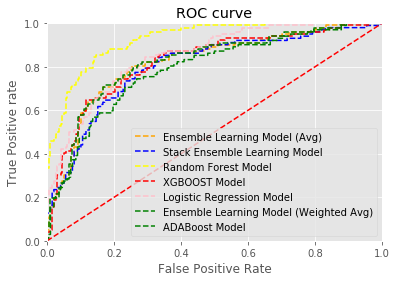

Ensemble Learning Model (Avg) 0.8213507625272332 
Stack Ensemble Learning Model 0.8039463260051495 
Random Forest Model 0.9263715587244999 
XGBOOST Model 0.8238265002970885 
Logistic Regression Model 0.8505149534561299 
Ensemble Learning Model (Weighted Avg) 0.8230837789661319 
ADABoost Learning Model 0.7872350960586254


In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# roc curve for ENSEMBLE
fpr1, tpr1, thresh1 = roc_curve(Y_val, y_pred_prob_AVGENSEMB[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_val, y_pred_prob_STACK[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_val, y_pred_prob_RF[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(Y_val, y_pred_prob_XG[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(Y_val, y_pred_prob_LOG[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(Y_val, y_pred_prob_WAVGENSEMB[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(Y_val, y_pred_prob_ADA[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_val))]
p_fpr, p_tpr, _ = roc_curve(Y_val, random_probs, pos_label=1)
# auc scores
auc_score1 = roc_auc_score(Y_val, y_pred_prob_AVGENSEMB[:,1])
auc_score2 = roc_auc_score(Y_val, y_pred_prob_STACK[:,1])
auc_score3 = roc_auc_score(Y_val, y_pred_prob_RF[:,1])
auc_score4 = roc_auc_score(Y_val, y_pred_prob_XG[:,1])
auc_score5 = roc_auc_score(Y_val, y_pred_prob_LOG[:,1])
auc_score6 = roc_auc_score(Y_val, y_pred_prob_WAVGENSEMB[:,1])
auc_score7 = roc_auc_score(Y_val, y_pred_prob_ADA[:,1])

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Ensemble Learning Model (Avg)')
plt.plot(fpr2, tpr2, linestyle='--',color='blue', label='Stack Ensemble Learning Model')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Random Forest Model')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='XGBOOST Model')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Logistic Regression Model')
plt.plot(fpr6, tpr6, linestyle='--',color='green', label='Ensemble Learning Model (Weighted Avg)')
plt.plot(fpr7, tpr7, linestyle='--',color='green', label='ADABoost Model')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig('ROC',dpi=800)
plt.show()
print("Ensemble Learning Model (Avg)",auc_score1,"\nStack Ensemble Learning Model",auc_score2,"\nRandom Forest Model",auc_score3,
     "\nXGBOOST Model",auc_score4,"\nLogistic Regression Model",auc_score5,"\nEnsemble Learning Model (Weighted Avg)",auc_score6,
     "\nADABoost Learning Model",auc_score7)

- The best AUC has been observed for Random Forest on the validation dataset i.e. 87.6%

In [ ]:
##Taking final Model to be Avg Ensembles and RF 

In [725]:
cm = metrics.confusion_matrix(Y_val, y_pred_class_RF)
cm

array([[160,  38],
       [ 24,  78]], dtype=int64)

Text(28.499999999999993, 0.5, 'True label')

Text(0.5, 10.5, 'Predicted label')

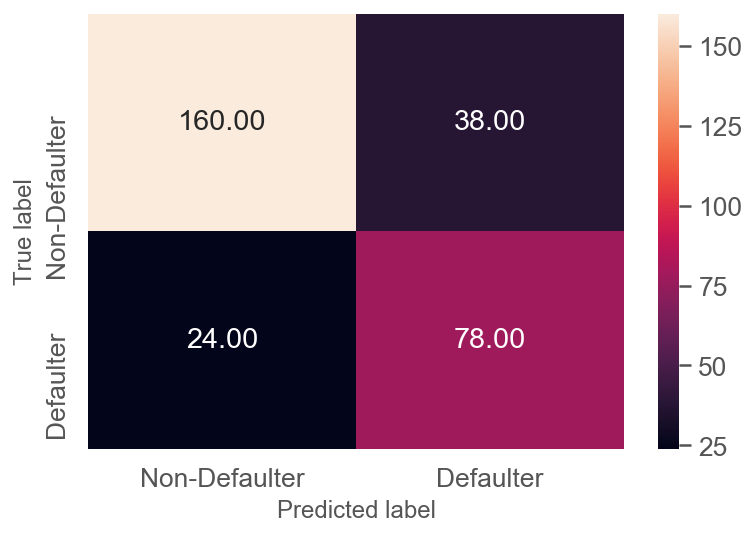

In [726]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Non-Defaulter", "Defaulter"] , yticklabels = ["Non-Defaulter", "Defaulter"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

In [727]:
metrics.accuracy_score(Y_val,y_pred_class_RF)

0.7933333333333333

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

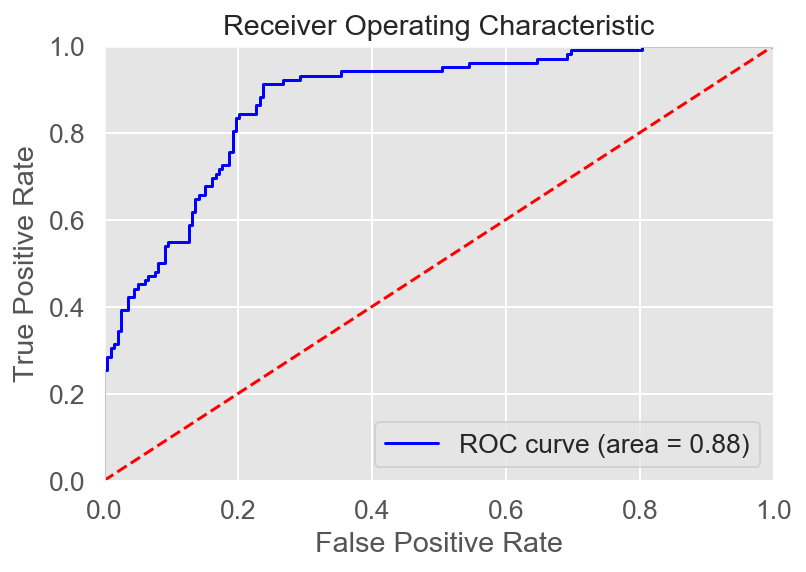

In [728]:
fpr3, tpr3, thresh3 = roc_curve(Y_val, y_pred_prob_RF[:,1], pos_label=1)
roc_auc3 = metrics.auc(fpr3, tpr3)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label='ROC curve (area = %0.2f)' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [743]:
#fpr3, tpr3, thresh3
#As we can notice, the minimum difference between the False Positive and True Positive is when our sensitivity value 
#is at 0.42 approx Now we will calculate the new cut off value based on this value of sensitivity and see how the accuracy of our model increases.

cutoff_prob3 = round(float(thresh3[(np.abs(tpr3 - 0.42)).argmin()]),2)
cutoff_prob3

0.67

### Decile Analysis Validation Data

- Valdating cut off value from the Decile analysis and KS statistics

In [749]:
prediction_class_RF=pd.DataFrame(y_pred_class_RF)
Y_val1= Y_val.reset_index()
final_test_pred_RF = pd.concat([Y_val1,pd.DataFrame(y_pred_prob_RF, columns=['Col_0', 'Col_1']),prediction_class_RF], axis=1)


In [750]:
final_test_pred_RF.rename(columns = {0: "Prediction"},  inplace = True) 

In [751]:
final_test_pred_RF.columns

Index(['index', 'status', 'Col_0', 'Col_1', 'Prediction'], dtype='object')

In [756]:

final_test_pred_RF['decile'] = pd.qcut(final_test_pred_RF['Col_1'],10,labels=['1','2','3','4','5','6','7','8','9','10'])
final_test_pred_RF.to_csv("final_test_pred_RF.csv")
final_test_pred_RF['Non-Defaulter'] = 1-final_test_pred_RF['Prediction']
df1 = pd.pivot_table(data=final_test_pred_RF,index=['decile'],values=['Prediction','Non-Defaulter','Col_1'],aggfunc={'Prediction':[np.sum],'Non-Defaulter':[np.sum],'Col_1' : [np.min,np.max]})



In [757]:
df1

Col_1           Non-Defaulter Prediction
        amax      amin           sum        sum
decile                                         
1       0.04  8.17e-03            30          0
2       0.08  4.54e-02            30          0
3       0.14  8.63e-02            30          0
4       0.24  1.46e-01            30          0
5       0.36  2.49e-01            30          0
6       0.46  3.70e-01            30          0
7       0.56  4.68e-01             4         26
8       0.64  5.67e-01             0         30
9       0.75  6.43e-01             0         30
10      0.98  7.72e-01             0         30

In [758]:
df1.columns = ['max_score','min_score','Non-Defaulter_Count','Defaulter_Count']
df1['Total_Cust'] = df1['Defaulter_Count']+df1['Non-Defaulter_Count']


In [759]:
df2 = df1.sort_values(by='min_score',ascending=False)

df2['Default_Rate'] = (df2['Defaulter_Count'] / df2['Total_Cust']).apply('{0:.2%}'.format)
default_sum = df2['Defaulter_Count'].sum()
non_default_sum = df2['Non-Defaulter_Count'].sum()
df2['Default %'] = (df2['Defaulter_Count']/default_sum).apply('{0:.2%}'.format)
df2['Non_Default %'] = (df2['Non-Defaulter_Count']/non_default_sum).apply('{0:.2%}'.format)

df2['ks_stats'] = np.round(((df2['Defaulter_Count'] / df2['Defaulter_Count'].sum()).cumsum() -(df2['Non-Defaulter_Count'] / df2['Non-Defaulter_Count'].sum()).cumsum()), 4) * 100
flag = lambda x: '*****' if x == df2['ks_stats'].max() else ''
df2['max_ks'] = df2['ks_stats'].apply(flag)
df2

,max_score,min_score,Non-Defaulter_Count,Defaulter_Count,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks
decile,,,,,,,,,,
10,0.98,7.72e-01,0,30,30,100.00%,25.86%,0.00%,25.86,
9,0.75,6.43e-01,0,30,30,100.00%,25.86%,0.00%,51.72,
8,0.64,5.67e-01,0,30,30,100.00%,25.86%,0.00%,77.59,
7,0.56,4.68e-01,4,26,30,86.67%,22.41%,2.17%,97.83,*****
6,0.46,3.70e-01,30,0,30,0.00%,0.00%,16.30%,81.52,
5,0.36,2.49e-01,30,0,30,0.00%,0.00%,16.30%,65.22,
4,0.24,1.46e-01,30,0,30,0.00%,0.00%,16.30%,48.91,
3,0.14,8.63e-02,30,0,30,0.00%,0.00%,16.30%,32.61,
2,0.08,4.54e-02,30,0,30,0.00%,0.00%,16.30%,16.30,


- Calculating accuracy on the new labels from optimum cutoff as depiced by KS Statistics

In [729]:
final_test_pred_RF['new_labels'] = final_test_pred_RF['Col_1'].map( lambda x: 1 if x >= 4.68e-01 else 0 )


Text(28.5, 0.5, 'True label')

Text(0.5, 10.5, 'Predicted label')

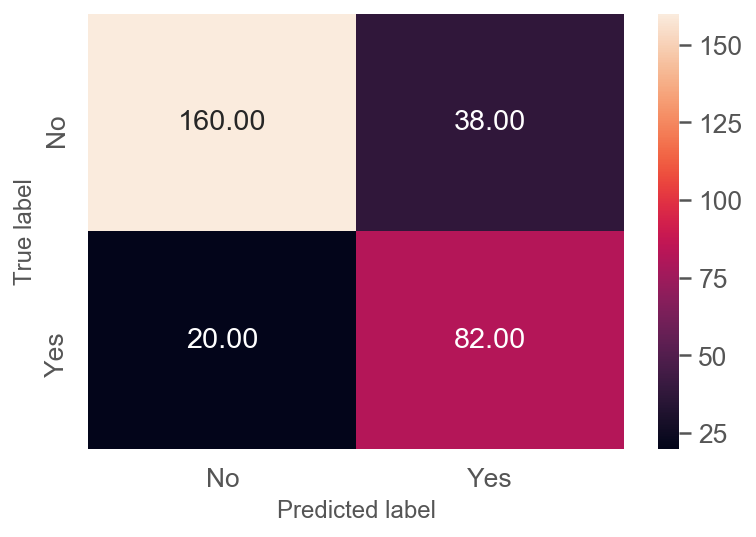

In [730]:
cm1 = metrics.confusion_matrix( Y_val,final_test_pred_RF.new_labels )
sns.heatmap(cm1, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

In [731]:
metrics.accuracy_score(Y_val,final_test_pred_RF.new_labels )

0.8066666666666666

- We observe that the accuarcy improves to 80.6% on the validation dataset.

In [768]:
##Exporting the final labels 
final_test_pred_RF.to_csv("final_test_pred_RF.csv")

## DECILE Analysis Train Data

In [777]:
# Predcited probability of each class.
prediction_prob_RF_train= RF_model_final.predict_proba(X)
# Predicted value of each class
prediction_class_RF_train = RF_model_final.predict(X)

prediction_class_RF_train=pd.DataFrame(prediction_class_RF_train)
Y1= Y.reset_index()
final_train_pred_RF = pd.concat([Y1,pd.DataFrame(prediction_prob_RF_train, columns=['Col_0', 'Col_1']),prediction_class_RF_train], axis=1)
final_train_pred_RF.rename(columns = {0: "Prediction"},  inplace = True) 
final_train_pred_RF['decile'] = pd.qcut(final_train_pred_RF['Col_1'],10,labels=['1','2','3','4','5','6','7','8','9','10'])
final_train_pred_RF.to_csv("final_test_pred_RF.csv")
final_train_pred_RF['Non-Defaulter'] = 1-final_train_pred_RF['Prediction']
df1train = pd.pivot_table(data=final_train_pred_RF,index=['decile'],values=['Prediction','Non-Defaulter','Col_1'],aggfunc={'Prediction':[np.sum],'Non-Defaulter':[np.sum],'Col_1' : [np.min,np.max]})
df1train.columns = ['max_score','min_score','Non-Defaulter_Count','Defaulter_Count']
df1train['Total_Cust'] = df1train['Defaulter_Count']+df1train['Non-Defaulter_Count']
df2train = df1train.sort_values(by='min_score',ascending=False)

df2train['Default_Rate'] = (df2train['Defaulter_Count'] / df2train['Total_Cust']).apply('{0:.2%}'.format)
default_sumtrain = df2train['Defaulter_Count'].sum()
non_default_sumtrain = df2train['Non-Defaulter_Count'].sum()
df2train['Default %'] = (df2train['Defaulter_Count']/default_sum).apply('{0:.2%}'.format)
df2train['Non_Default %'] = (df2train['Non-Defaulter_Count']/non_default_sumtrain).apply('{0:.2%}'.format)

df2train['ks_stats'] = np.round(((df2train['Defaulter_Count'] / df2train['Defaulter_Count'].sum()).cumsum() -(df2train['Non-Defaulter_Count'] / df2train['Non-Defaulter_Count'].sum()).cumsum()), 4) * 100
flagtrain = lambda x: '*****' if x == df2train['ks_stats'].max() else ''
df2train['max_ks'] = df2train['ks_stats'].apply(flagtrain)
df2train


,max_score,min_score,Non-Defaulter_Count,Defaulter_Count,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks
decile,,,,,,,,,,
10,0.98,7.19e-01,0,70,70,100.00%,60.34%,0.00%,27.34,
9,0.72,6.44e-01,0,70,70,100.00%,60.34%,0.00%,54.69,
8,0.64,5.62e-01,0,70,70,100.00%,60.34%,0.00%,82.03,
7,0.56,4.66e-01,24,46,70,65.71%,39.66%,5.41%,94.59,*****
6,0.47,3.71e-01,70,0,70,0.00%,0.00%,15.77%,78.83,
5,0.37,2.63e-01,70,0,70,0.00%,0.00%,15.77%,63.06,
4,0.26,1.65e-01,70,0,70,0.00%,0.00%,15.77%,47.30,
3,0.16,1.11e-01,70,0,70,0.00%,0.00%,15.77%,31.53,
2,0.11,5.01e-02,70,0,70,0.00%,0.00%,15.77%,15.77,


### GAINS CHART

In [793]:
df2['default_cum_test%'] = np.round(((df2['Defaulter_Count'] / df2['Defaulter_Count'].sum()).cumsum()), 4) * 100
df2

,max_score,min_score,Non-Defaulter_Count,Defaulter_Count,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks,default_cum%,default_cum_test%
decile,,,,,,,,,,,,
10,0.98,7.72e-01,0,30,30,100.00%,25.86%,0.00%,25.86,,25.86,25.86
9,0.75,6.43e-01,0,30,30,100.00%,25.86%,0.00%,51.72,,51.72,51.72
8,0.64,5.67e-01,0,30,30,100.00%,25.86%,0.00%,77.59,,77.59,77.59
7,0.56,4.68e-01,4,26,30,86.67%,22.41%,2.17%,97.83,*****,100.00,100.00
6,0.46,3.70e-01,30,0,30,0.00%,0.00%,16.30%,81.52,,100.00,100.00
5,0.36,2.49e-01,30,0,30,0.00%,0.00%,16.30%,65.22,,100.00,100.00
4,0.24,1.46e-01,30,0,30,0.00%,0.00%,16.30%,48.91,,100.00,100.00
3,0.14,8.63e-02,30,0,30,0.00%,0.00%,16.30%,32.61,,100.00,100.00
2,0.08,4.54e-02,30,0,30,0.00%,0.00%,16.30%,16.30,,100.00,100.00


In [794]:
df_gains = df2[['default_cum_test%']]


In [795]:
df2train['default_cum_train%'] = np.round(((df2train['Defaulter_Count'] / df2train['Defaulter_Count'].sum()).cumsum()), 4) * 100
df2train

,max_score,min_score,Non-Defaulter_Count,Defaulter_Count,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks,default_cum%,default_cum_train%
decile,,,,,,,,,,,,
10,0.98,7.19e-01,0,70,70,100.00%,60.34%,0.00%,27.34,,27.34,27.34
9,0.72,6.44e-01,0,70,70,100.00%,60.34%,0.00%,54.69,,54.69,54.69
8,0.64,5.62e-01,0,70,70,100.00%,60.34%,0.00%,82.03,,82.03,82.03
7,0.56,4.66e-01,24,46,70,65.71%,39.66%,5.41%,94.59,*****,100.00,100.00
6,0.47,3.71e-01,70,0,70,0.00%,0.00%,15.77%,78.83,,100.00,100.00
5,0.37,2.63e-01,70,0,70,0.00%,0.00%,15.77%,63.06,,100.00,100.00
4,0.26,1.65e-01,70,0,70,0.00%,0.00%,15.77%,47.30,,100.00,100.00
3,0.16,1.11e-01,70,0,70,0.00%,0.00%,15.77%,31.53,,100.00,100.00
2,0.11,5.01e-02,70,0,70,0.00%,0.00%,15.77%,15.77,,100.00,100.00


In [796]:
df_gainstrain = df2train[['default_cum_train%']]
df_gainstrain.reset_index()
df_gainstrain['Base %'] = [10,20,30,40,50,60,70,80,90,100]


,decile,default_cum_train%
0,10,27.34
1,9,54.69
2,8,82.03
3,7,100.00
4,6,100.00
5,5,100.00
6,4,100.00
7,3,100.00
8,2,100.00
9,1,100.00


C:\Users\Shikha.roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [797]:

final_g = pd.concat([df_gainstrain,df_gains],axis=1)
final_g


,default_cum_train%,Base %,default_cum_test%
decile,,,
10,27.34,10,25.86
9,54.69,20,51.72
8,82.03,30,77.59
7,100.00,40,100.00
6,100.00,50,100.00
5,100.00,60,100.00
4,100.00,70,100.00
3,100.00,80,100.00
2,100.00,90,100.00


Text(0, 0.5, 'Proportion of Defaulters')

Text(0.5, 0, 'Decile')

Text(0.5, 1.0, 'Gains Chart')

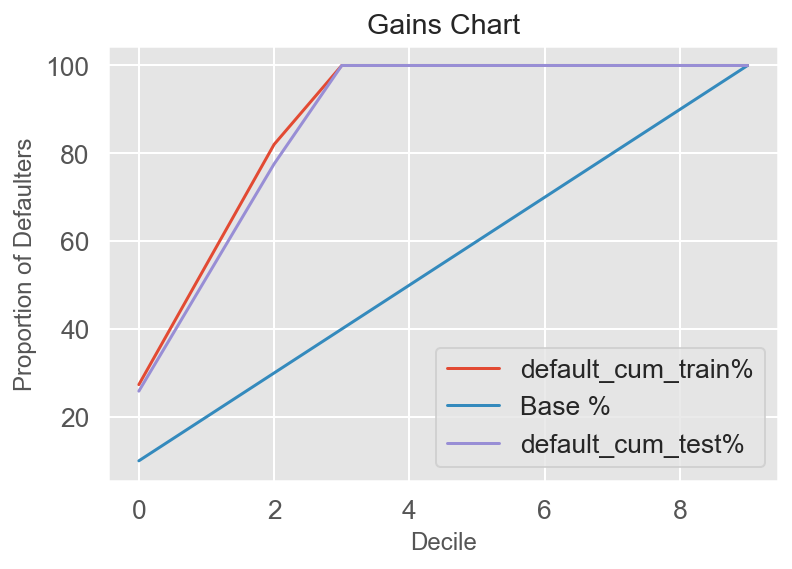

In [798]:
gains_chart = final_g.plot(kind='line',use_index=False)
gains_chart.set_ylabel("Proportion of Defaulters",fontsize=12)
gains_chart.set_xlabel("Decile",fontsize=12)
gains_chart.set_title("Gains Chart")

- It can be observed that the Random Forest model is performing better than the random baseline model.

In [809]:
cm1

array([[160,  38],
       [ 20,  82]], dtype=int64)

In [816]:
FP = cm1.sum(axis=0) - np.diag(cm1) 
FN = cm1.sum(axis=1) - np.diag(cm1)
TP = np.diag(cm1)
TN = cm1.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = 100*TP/(TP+FN)
TNR = 100*TN/(TN+FP) 
FPR = 100*FP/(FP+TN)
FNR = 100*FN/(TP+FN)
ACC = 100*((TP+TN)/(TP+FP+FN+TN))

In [817]:
print("Sensitivity:",TPR[0],"\nSpecificity:",TNR[0],"\nPrecison :","\nFalse Postive Rate:",FPR[0],"\nFalse Negative Rate",FNR[0],"\nOverall Acuracy",ACC[0])

Sensitivity: 80.8080808080808 
Specificity: 80.3921568627451 
Precison : 
False Postive Rate: 19.607843137254903 
False Negative Rate 19.19191919191919 
Overall Acuracy 80.66666666666666


In [38]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [39]:
seed = 7
numpy.random.seed(seed)

In [40]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
neurons = [1, 5, 10, 15, 20, 25, 30]




param_grid = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer,learn_rate=learn_rate, momentum=momentum,init_mode=init_mode,activation=activation,dropout_rate=dropout_rate, weight_constraint=weight_constraint,neurons=neurons)

In [53]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD',  'Adam']
learn_rate = [0.001, 0.2]
momentum = [0.01]
init_mode = [ 'normal']
activation = ['softmax', 'relu', 'tanh', 'sigmoid']
weight_constraint = [1, 2,]
dropout_rate = [0.2]
neurons = [1, 5]




param_grid = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer,init_mode=init_mode,activation=activation,dropout_rate=dropout_rate, weight_constraint=weight_constraint,neurons=neurons)

In [56]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [60]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=2)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)


Epoch 1/10


ValueError: in user code:

    C:\Users\Shikha.roy\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Shikha.roy\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Shikha.roy\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Shikha.roy\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Shikha.roy\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Shikha.roy\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Shikha.roy\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Shikha.roy\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\Shikha.roy\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_56 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape [10, 54]


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [54]:
##last layer is chosen to be sigmoid due to logistic rregression
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=8, kernel_initializer=init_mode, activation=activation, kernel_constraint=maxnorm(4)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model



In [55]:
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=2)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000271A8296D08>, as the constructor either does not set or modifies parameter epochs

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [103]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
n_iter_no_change = [10, 50, 100]
solver = ['lbfgs', 'sgd', 'adam']
learn_rate = ['constant','invscaling', 'adaptive']
momentum = [0.01]
learning_rate_init = [0.001]
activation = ['identity', 'logistic', 'tanh', 'relu']
weight_constraint = [1, 2]
dropout_rate = [0.2]
neurons = [1, 5]
#epoch
max_iter=[1000,2000,3000]



param_grid = dict(max_iter=max_iter,momentum=momentum,learning_rate=learn_rate,batch_size=batch_size,solver=solver,learning_rate_init=learning_rate_init,activation=activation)

In [104]:
from sklearn.neural_network import MLPClassifier
#optimiser is adam
#3 hidden layers of 10 neurons each
#mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', max_iter=1000)
mlp = MLPClassifier(hidden_layer_sizes=4)

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=5,verbose=2)



In [106]:
MLP=grid.fit(X,Y)



Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 56.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 85.9min finished
C:\Users\Shikha.roy\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [119]:
MLP

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=4,
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None...
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'batch_size': [10, 20, 40, 60, 80, 100],
                         'learning_rate': ['constant', 'invscaling',
                        

In [109]:
import pickle
filename = 'Model_MLP.sav'
pickle.dump(MLP.best_estimator_, open(filename, 'wb'))


In [108]:
import pickle
filename = 'Model_MLP1.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

In [111]:
predict_train = grid.predict(X)
predict_test = grid.predict(X_val)

In [112]:
# Predcited probability of each class.
nn=MLP.best_estimator_
y_pred_prob_nn = nn.predict_proba(X_val)
# Predicted value of each class
y_pred_class_nn = nn.predict(X_val)

print(metrics.classification_report(Y_val, y_pred_class_nn))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       198
           1       0.74      0.50      0.60       102

    accuracy                           0.77       300
   macro avg       0.76      0.70      0.72       300
weighted avg       0.77      0.77      0.76       300



In [116]:
nn

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=40, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.01, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [113]:
##EXPORTING The output of the test data
prediction_nn= pd.DataFrame(y_pred_prob_nn)
prediction_class_nn=pd.DataFrame(y_pred_class_nn)

In [114]:
metrics.accuracy_score(Y_val,y_pred_class_nn)

0.77

Text(0.5, 15.0, 'Predicted label')

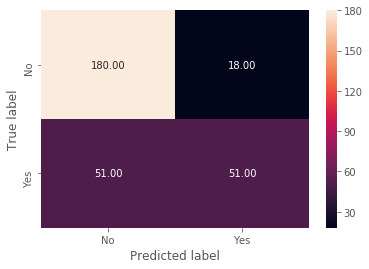

In [115]:
cm1 = metrics.confusion_matrix( Y_val,prediction_class_nn )
sns.heatmap(cm1, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

Text(0.5, 0, 'False Positive Rate')

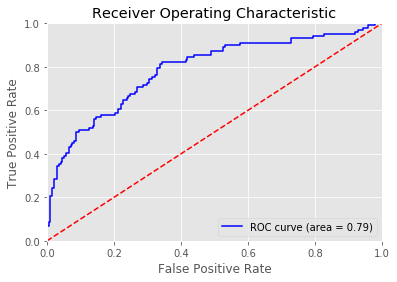

In [118]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr7, tpr7, thresh7 = roc_curve(Y_val, y_pred_prob_nn[:,1], pos_label=1)
roc_auc7= metrics.auc(fpr7, tpr7)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr7, tpr7, 'b', label='ROC curve (area = %0.2f)' % roc_auc7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
